# Victoria Property Market Analysis

The data is already scraped from realestate.com.au and saved as a csv file containing 870000 rows.

In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from bs4 import BeautifulSoup as bs
import time
import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('SOLD_complete.csv')

In [4]:
df.head()

,address,agency,agent_name,agent_title,baths,beds,cars,price,property_type,sold_date,suburb,time
0,"2/5-7 Princes Street, Abbotsford",Collins Simms - Inner North,None,None,1,1,1,"$270,000",Apartment,Sold on 30 May 2015,Abbotsford,2019-01-05 17:24:35.774257
1,"310A/11 Flockhart St, Abbotsford",Ray White - Ringwood,None,None,1,1,1,"$299,000",Apartment,Sold on 06 Sep 2017,Abbotsford,2019-01-05 17:24:35.776254
2,"704/20 Shamrock Street, Abbotsford",Biggin & Scott - Richmond,Emily Sayers,None,1,1,None,"$300,000",Apartment,Sold on 08 Sep 2017,Abbotsford,2019-01-05 17:24:35.778246
3,"6/241 Nicholson Street, Abbotsford",Biggin & Scott - Richmond,Emily Sayers,None,1,1,1,"$300,000",Apartment,Sold on 08 Oct 2016,Abbotsford,2019-01-05 17:24:35.780241
4,"10/20 Valiant Street, Abbotsford",LJ Hooker - Boronia,Julien Karolos,Agent:,1,1,1,"$300,000",Apartment,Sold on 05 Jun 2010,Abbotsford,2019-01-05 17:24:35.782235


In [5]:
df.describe()

,address,agency,agent_name,agent_title,baths,beds,cars,price,property_type,sold_date,suburb,time
count,880469,880469,880469,880469,880469,880469,880469,880469,880469,880061,880469,880469
unique,645745,2398,7161,2,23,29,45,13248,25,4925,2250,880469
top,"Address available on request, Wonthaggi",None,None,None,2,3,2,Contact agent,House,Sold on 28 Oct 2017,Mornington,2019-01-06 02:26:57.412887
freq,1245,46087,496769,654379,390974,387620,379368,353180,625866,892,14045,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880469 entries, 0 to 880468
Data columns (total 12 columns):
address          880469 non-null object
agency           880469 non-null object
agent_name       880469 non-null object
agent_title      880469 non-null object
baths            880469 non-null object
beds             880469 non-null object
cars             880469 non-null object
price            880469 non-null object
property_type    880469 non-null object
sold_date        880061 non-null object
suburb           880469 non-null object
time             880469 non-null object
dtypes: object(12)
memory usage: 80.6+ MB


In [7]:
df.agency.value_counts()

None                                                                                         46087
Jellis Craig & Company Pty Ltd - HAWTHORN                                                     5764
PRD Nationwide - Ballarat                                                                     4796
PBE Real Estate - Wonthaggi                                                                   4336
Harcourts Rata & Co - Thomastown-Lalor, Epping-Wollert, Mill Park-South Morang, Reservoir     4155
Hayeswinckle - Highton                                                                        4010
Marshall White - Stonnington                                                                  3766
Harcourts - Ballarat                                                                          3569
hockingstuart - Ballarat                                                                      3403
Eview Group - Corporate                                                                       3336
Tweed Suth

In [8]:
df.agent_name.value_counts()

None                            496769
Sales Department - Wonthaggi      1998
Luke Campbell                     1498
Michelle Winckle                   931
Mark Dudley                        930
Shane Spiteri                      902
Tony Moorfoot                      865
Anthony Rabl                       847
Ben Riddle                         775
Barry Plant Mitchell Shire         760
Marshall Rushford                  746
Terry Cleary                       719
Daniel Lawrie                      717
Helen Ryan                         710
Ben Roberts                        697
Jason Gigliotti                    675
Rachelle Potts                     661
Brian Mark Real Estate .           659
Las Anastasiadis                   654
Kayla Ridolfi                      649
Daniel Lamanna                     641
Joe Mavrikos                       628
Christian Bartley                  620
Michael O'Sullivan                 612
Kayn Luff                          592
Glenn Grech              

In [9]:
df.property_type.value_counts()

House                   625866
Unit                     69740
Residential Land         60370
Apartment                57736
Townhouse                43848
Acreage                   5603
Lifestyle                 5439
Other                     2921
Villa                     2705
Farmlet                   1262
Livestock                  779
Studio                     691
Block Of Units             628
Mixed Farming              620
Flat                       499
Cropping                   339
Retirement Living          300
Duplex/Semi-detached       263
Terrace                    208
Warehouse                  202
Dairy                      185
Alpine                     111
Horticulture                69
Viticulture/vineyard        48
Serviced Apartment          37
Name: property_type, dtype: int64

In [10]:
df.suburb.value_counts()

Mornington              14045
Geelong                 12890
Melton                  10394
Bellarine                9665
Ballarat                 8039
Grantville               7797
Bendigo                  7102
Pakenham                 7053
Berwick                  6747
Frankston                6606
Melbourne                6318
Mount Dandenong          6181
Craigieburn              5822
Macedon                  5585
Sunbury                  5464
Reservoir                5407
Tarneit                  5187
Werribee                 4981
Broadford                4930
Hoppers Crossing         4798
Bacchus Marsh            4784
Moorabool                4784
mornington,+vic+3931     4757
Point Cook               4601
Traralgon                4591
Bairnsdale               4541
Mildura                  4169
Korumburra               4135
Leongatha                4135
Sale                     4000
                        ...  
Dingwall                    1
Adams Estate                1
Lucyvale  

In [11]:
df[df[['address','sold_date']].duplicated()]

,address,agency,agent_name,agent_title,baths,beds,cars,price,property_type,sold_date,suburb,time
391,"25 Yarra Bank Court, Abbotsford",Nelson Alexander - Fitzroy,None,None,None,None,None,Contact agent,Residential Land,Sold on 11 Dec 2010,Abbotsford,2019-01-05 17:24:48.509064
682,"3 Trenerry Crescent, Abbotsford",Nelson Alexander - Fitzroy,Roland Paterson,Agent:,1,2,None,"$925,000",House,Sold on 18 Apr 2015,Abbotsford,2019-01-05 17:25:00.480473
683,"3 Trenerry Crescent, Abbotsford",Nelson Alexander - Fitzroy,Roland Paterson,Agent:,1,2,None,"$925,000",House,Sold on 18 Apr 2015,Abbotsford,2019-01-05 17:25:00.482470
957,"11/37 St Kinnord Street, Aberfeldie",Nelson Alexander - Essendon,Barry Hamond,None,1,1,1,"$275,000",Apartment,Sold on 23 Nov 2015,Aberfeldie,2019-01-05 17:25:13.748578
1480,"3 Lighthouse Road, Aireys Inlet",Great Ocean Road Real Estate - ANGLESEA,None,None,1,3,None,"$600,000",House,Sold on 26 Jan 2010,Aireys Inlet,2019-01-05 17:25:41.436028
1515,"52 Aireys Street, Aireys Inlet",Great Ocean Road Real Estate - ANGLESEA,None,None,1,4,2,"$680,000",House,Sold on 09 Sep 2012,Aireys Inlet,2019-01-05 17:25:42.166978
1607,"42B Bambra Road, Aireys Inlet",Great Ocean Properties - Aireys Inlet,Marty Maher,Agent:,None,None,None,"$970,000",Residential Land,Sold on 01 Apr 2016,Aireys Inlet,2019-01-05 17:25:45.053766
1651,"2/67 Roberts Road, Airport West",Nelson Alexander - Essendon,None,None,1,3,2,Contact agent,Unit,Sold on 15 May 2009,Airport West,2019-01-05 17:25:47.751295
1670,"26 Laurence Avenue, Airport West",Nelson Alexander - Keilor East,None,None,1,1,None,Contact agent,House,Sold on 05 Apr 2012,Airport West,2019-01-05 17:25:48.544509
3455,"28 Herbert Place, Albert Park",Cayzer Real Estate - Port Melbourne,None,None,1,2,None,Contact agent,House,Sold on 25 Jul 2009,Albert Park,2019-01-05 17:26:52.525243


In [12]:
df[df.address[9357] == df.address]

,address,agency,agent_name,agent_title,baths,beds,cars,price,property_type,sold_date,suburb,time
9343,"1 Brennan Court, Altona Meadows",None,None,None,2,4,2,"$345,000",House,Sold on 16 Jun 2008,Altona Meadows,2019-01-05 17:30:38.401642
9357,"1 Brennan Court, Altona Meadows",Hunter French Real Estate - Altona Meadows,MICHAEL TSIGERIDIS,Agent:,2,4,2,"$345,000",House,Sold on 16 Jun 2008,Altona Meadows,2019-01-05 17:30:39.134671
10464,"1 Brennan Court, Altona Meadows",Sweeney - ALTONA,Julie Burt,Agent:,2,4,4,"$585,000",House,Sold on 09 Mar 2017,Altona Meadows,2019-01-05 17:31:16.778542


In [13]:
df.agent_title.value_counts()

None      654379
Agent:    226090
Name: agent_title, dtype: int64

In [14]:
df.price.head()

0    $270,000
1    $299,000
2    $300,000
3    $300,000
4    $300,000
Name: price, dtype: object

In [15]:
df.address.value_counts()[:20]

Address available on request, Wonthaggi           1245
Address available on request, Bacchus Marsh        578
Address available on request, Warrnambool          534
Address available on request, Cranbourne           476
Address available on request, Epping               468
Address available on request, Wangaratta           415
Address available on request, Hoppers Crossing     391
Address available on request, Boronia              358
Address available on request, Werribee             338
Address available on request, Shepparton           336
Address available on request, Inverloch            334
Address available on request, Frankston            323
Address available on request, Wodonga              315
Address available on request, Mount Martha         306
Address available on request, Tarneit              299
Address available on request, South Morang         294
Address available on request, Montrose             293
Address available on request, Croydon              291
Address av

In [16]:
df.iloc[:,:10].duplicated().sum()

144232

In [17]:
df[['address', 'sold_date']].duplicated().sum()

148242

### Tidiness Issues

1. sold_date column has unnecessary string and is not date format.
2. suburb value in suburb column is sometimes different than the one in the address column.
3. agency name and agency suburb are in the same column.
4. agent_title is either None or Agent, and also time column is unnecessary.
5. columns beds, baths, cars and price are strings not integers.

### Quality Issues

1. There are many duplicate rows.
2. Some addresses are not mentioned and it just says "Address available on request".
3. There are a large number of rows with no address.
4. There are some outliers in the dataset.

## Cleaning

In [18]:
clean = df.copy()

### Fixing sold_date column to standard date format

I will drop the rows without a sold date and then change the rest of them into datatime format.

In [19]:
clean.drop(clean[clean.sold_date.isnull()].index,axis=0, inplace=True)

In [20]:
clean.sold_date = pd.to_datetime(clean.sold_date.apply(lambda x : x.split('on ')[1:][0]))

In [21]:
clean.head()

,address,agency,agent_name,agent_title,baths,beds,cars,price,property_type,sold_date,suburb,time
0,"2/5-7 Princes Street, Abbotsford",Collins Simms - Inner North,None,None,1,1,1,"$270,000",Apartment,2015-05-30,Abbotsford,2019-01-05 17:24:35.774257
1,"310A/11 Flockhart St, Abbotsford",Ray White - Ringwood,None,None,1,1,1,"$299,000",Apartment,2017-09-06,Abbotsford,2019-01-05 17:24:35.776254
2,"704/20 Shamrock Street, Abbotsford",Biggin & Scott - Richmond,Emily Sayers,None,1,1,None,"$300,000",Apartment,2017-09-08,Abbotsford,2019-01-05 17:24:35.778246
3,"6/241 Nicholson Street, Abbotsford",Biggin & Scott - Richmond,Emily Sayers,None,1,1,1,"$300,000",Apartment,2016-10-08,Abbotsford,2019-01-05 17:24:35.780241
4,"10/20 Valiant Street, Abbotsford",LJ Hooker - Boronia,Julien Karolos,Agent:,1,1,1,"$300,000",Apartment,2010-06-05,Abbotsford,2019-01-05 17:24:35.782235


In [22]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880061 entries, 0 to 880468
Data columns (total 12 columns):
address          880061 non-null object
agency           880061 non-null object
agent_name       880061 non-null object
agent_title      880061 non-null object
baths            880061 non-null object
beds             880061 non-null object
cars             880061 non-null object
price            880061 non-null object
property_type    880061 non-null object
sold_date        880061 non-null datetime64[ns]
suburb           880061 non-null object
time             880061 non-null object
dtypes: datetime64[ns](1), object(11)
memory usage: 87.3+ MB


### Fixing suburb name in the suburb column

The values in the suburb column come from the searched suburb name in the scraping process. Some suburb names are greater regions which contain other suburbs in the search results. 
To fix this I will extract the suburb name from the address column and replace the suburb value with it.

In [23]:
clean.suburb = clean.address.apply(lambda x : x.split(', ')[-1])

In [24]:
clean.head()

,address,agency,agent_name,agent_title,baths,beds,cars,price,property_type,sold_date,suburb,time
0,"2/5-7 Princes Street, Abbotsford",Collins Simms - Inner North,None,None,1,1,1,"$270,000",Apartment,2015-05-30,Abbotsford,2019-01-05 17:24:35.774257
1,"310A/11 Flockhart St, Abbotsford",Ray White - Ringwood,None,None,1,1,1,"$299,000",Apartment,2017-09-06,Abbotsford,2019-01-05 17:24:35.776254
2,"704/20 Shamrock Street, Abbotsford",Biggin & Scott - Richmond,Emily Sayers,None,1,1,None,"$300,000",Apartment,2017-09-08,Abbotsford,2019-01-05 17:24:35.778246
3,"6/241 Nicholson Street, Abbotsford",Biggin & Scott - Richmond,Emily Sayers,None,1,1,1,"$300,000",Apartment,2016-10-08,Abbotsford,2019-01-05 17:24:35.780241
4,"10/20 Valiant Street, Abbotsford",LJ Hooker - Boronia,Julien Karolos,Agent:,1,1,1,"$300,000",Apartment,2010-06-05,Abbotsford,2019-01-05 17:24:35.782235


### Fixing agency name

Agency names combine the name of the real estate agency and the branch's suburb, I'll extract the agency name from the string.

In [25]:
clean['agency'] = clean.agency.apply(lambda x : x.split(' - ')[0])

In [26]:
clean.head()

,address,agency,agent_name,agent_title,baths,beds,cars,price,property_type,sold_date,suburb,time
0,"2/5-7 Princes Street, Abbotsford",Collins Simms,None,None,1,1,1,"$270,000",Apartment,2015-05-30,Abbotsford,2019-01-05 17:24:35.774257
1,"310A/11 Flockhart St, Abbotsford",Ray White,None,None,1,1,1,"$299,000",Apartment,2017-09-06,Abbotsford,2019-01-05 17:24:35.776254
2,"704/20 Shamrock Street, Abbotsford",Biggin & Scott,Emily Sayers,None,1,1,None,"$300,000",Apartment,2017-09-08,Abbotsford,2019-01-05 17:24:35.778246
3,"6/241 Nicholson Street, Abbotsford",Biggin & Scott,Emily Sayers,None,1,1,1,"$300,000",Apartment,2016-10-08,Abbotsford,2019-01-05 17:24:35.780241
4,"10/20 Valiant Street, Abbotsford",LJ Hooker,Julien Karolos,Agent:,1,1,1,"$300,000",Apartment,2010-06-05,Abbotsford,2019-01-05 17:24:35.782235


### Dropping agent_title and time columns

It seems agency_title columns doesn't present any valuable information. I'll drop this column from the dataset.

In [27]:
clean.drop(['agent_title','time'],axis=1,inplace=True)

In [28]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880061 entries, 0 to 880468
Data columns (total 10 columns):
address          880061 non-null object
agency           880061 non-null object
agent_name       880061 non-null object
baths            880061 non-null object
beds             880061 non-null object
cars             880061 non-null object
price            880061 non-null object
property_type    880061 non-null object
sold_date        880061 non-null datetime64[ns]
suburb           880061 non-null object
dtypes: datetime64[ns](1), object(9)
memory usage: 73.9+ MB


### Changing beds, baths, cars and price columns to integer

The columns beds, baths, cars and price are extracted in string format, to be able to do analysis and calculations on these numbers I'll transform them into integers and set the rows with no value to 0.

In [29]:
clean.beds = clean.beds.apply(lambda x : x.replace(' ',''))

In [30]:
clean.baths = clean.baths.apply(lambda x : x.replace(' ',''))

In [31]:
clean.cars = clean.cars.apply(lambda x : x.replace(' ',''))

In [32]:
clean.beds = clean.beds.apply(lambda x : int(x) if x!='None' else 0)

In [33]:
clean.baths = clean.baths.apply(lambda x : int(x) if x!='None' else 0)

In [34]:
clean.cars = clean.cars.apply(lambda x : int(x) if x!='None' else 0)

In [35]:
clean.price = clean.price.apply(lambda x: x.replace('$',''))

In [36]:
clean.price = clean.price.apply(lambda x :x.replace(',',''))

In [37]:
clean.price = clean.price.apply(lambda x : 0 if x=='Contact agent' else int(x))

In [38]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 880061 entries, 0 to 880468
Data columns (total 10 columns):
address          880061 non-null object
agency           880061 non-null object
agent_name       880061 non-null object
baths            880061 non-null int64
beds             880061 non-null int64
cars             880061 non-null int64
price            880061 non-null int64
property_type    880061 non-null object
sold_date        880061 non-null datetime64[ns]
suburb           880061 non-null object
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 73.9+ MB


In [39]:
clean.describe()

,baths,beds,cars,price
count,880061.000000,880061.000000,880061.000000,8.800610e+05
mean,1.487812,2.880097,1.713451,4.194425e+05
std,1.574466,1.213675,18.063384,1.472575e+07
min,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,2.000000,1.000000,0.000000e+00
50%,1.000000,3.000000,2.000000,2.750000e+05
75%,2.000000,4.000000,2.000000,5.100000e+05
max,1300.000000,37.000000,11951.000000,4.294967e+09


### Fixing rows without an address

Some rows do not have a valid address, I'll drop these rows from the dataset.

In [40]:
clean[clean.address.apply(lambda x : 'Address available' in x)].count()

address          28444
agency           28444
agent_name       28444
baths            28444
beds             28444
cars             28444
price            28444
property_type    28444
sold_date        28444
suburb           28444
dtype: int64

In [41]:
clean.drop(clean[clean.address.apply(lambda x : 'Address available' in x)].index,axis= 0, inplace=True)

In [42]:
clean.address.value_counts()[:10]

132-134 Maroondah Highway, Mooroolbark    19
7835 Goulburn Valley Highway, Kialla      18
1268 Mountain Highway, The Basin          17
10 Rex Street, Paynesville                16
7 Scott Court, Mirboo North               15
72 Edols Street, Ballan                   13
81 Facey Drive, Tolmie                    12
Kelpie Boulevard, Curlewis                12
109 Hastings Road, Greendale              12
301/96 The Avenue, Mount Buller           12
Name: address, dtype: int64

### Fixing the outliers

Now that the dataset is cleaner I can do some basic assessment on outliers. I'll visually check the strange rows and random check the web page allocated to them on the realestate.com.au.  

In [43]:
clean[clean.beds > 10]

,address,agency,agent_name,baths,beds,cars,price,property_type,sold_date,suburb
4902,"36 Villeneuve Street, Alexandra",Landmark Harcourts,None,2,20,3,0,House,2010-04-08,Alexandra
10705,"1-5/39 Fitzpatrick Drive, Altona Meadows",Hunter French Real Estate,None,9,13,5,2410000,Townhouse,2017-10-02,Altona Meadows
10706,"1-5/39 Fitzpatrick Drive, Altona Meadows",Hunter French,None,9,13,5,2410000,Townhouse,2017-10-02,Altona Meadows
13013,"164 - 170 Great Ocean Road, Anglesea",Great Ocean Road Real Estate,Kellie Saddington,11,20,14,1875000,House,2014-11-01,Anglesea
13738,"6080 Great Ocean Road, Apollo Bay",Castran Real Estate,John Castran,20,20,0,2350000,House,2013-09-10,Apollo Bay
17617,"527 Orrong Road, Armadale",Biggin & Scott,None,5,13,4,0,House,2016-05-06,Armadale
17653,"506 Orrong Road, Armadale",Jellis Craig,None,8,14,10,0,House,2009-04-30,Armadale
20603,"470-472 Warrigal Road, Ashburton",Frederick Property,Daniel Chu,4,12,4,2300000,House,2016-10-16,Ashburton
22386,"8 Ross Street, Aspendale",Barry Plant,Jeremiah Siemianow,8,11,8,1350000,House,2017-12-20,Aspendale
25480,"'Kurrajong' Mayday Hills, Beechworth",First National Real Estate,Tony Stockdale,3,12,0,450000,House,2016-01-18,Beechworth


It appears that some property listings have large numbers of bedrooms, bathrooms and car parks that are not actually real.  
In some other cases the property is a Block of Units and the numbers are associated with the total number of bed, bath, car in all units not in each individual unit.  
I think property_type is a good measurment to decide whether these values are real or not.  
For the purpose of this analysis which is to analyze the general property market in the state of Victoria, Australia, I'm going to analyze the dataset mainly using the common property types such as House, Townhouse, Unit and Apartment.   


In [44]:
clean[clean.price > 10000000]

,address,agency,agent_name,baths,beds,cars,price,property_type,sold_date,suburb
10709,"4 O'Brien Court, Altona Meadows",Sweeney,Peter Seitanidis,1,4,1,2147483647,House,2012-09-13,Altona Meadows
30373,"11 Osborne Street, Bacchus Marsh",First National Rayner,Graeme Rayner,1,3,0,123456789,House,2011-05-26,Bacchus Marsh
30374,"00 Dicksons Road, Bacchus Marsh",John Kontek,Geoff Taylor,1,2,10,165000000,Acreage,2017-12-06,Bacchus Marsh
75371,"Banks Road/Ocean Grand Drive, Ocean Grove",Hocking Stuart,Carl McCann,0,0,0,11100000,Residential Land,2017-05-24,Ocean Grove
113311,"11-13 Irving Avenue, Box Hill",Buxton,Jim Chen,3,6,4,12200000,House,2017-11-24,Box Hill
134543,"21 Elsie Mews, Brunswick East",None,None,3,3,1,2147483647,Townhouse,2008-12-24,Brunswick East
142274,"12 Akoonah Court, Burnside",YPA Caroline Springs,None,2,3,1,2147483647,House,2008-09-26,Burnside
145826,"4385 South Gippsland Highway, Caldermeade",Alex Scott & Staff,None,1,3,0,4294967295,Dairy,2018-05-21,Caldermeade
173996,"14A & 14B Douglas Avenue, Chelsea",Eview Group,None,3,3,1,1915000000,House,2017-10-28,Chelsea
191081,"39 Bishop Street, Coburg",Harcourts Roxburgh Park,None,1,3,0,2147483647,House,2011-08-08,Coburg


By looking at the top most expensive properties it is obvious that most of the prices are random and not real, I made sure of this by checking some of the properties on the website.  
Also some prices accidently have one or two extra 0's.  
I will drop the top 0.1% of rows with the highest number of beds, baths, car parks and prices to normalize the dataset among all property_types.

In [45]:
clean.quantile(.999)

baths          5.0
beds           7.0
cars          11.0
price    3120000.0
Name: 0.999, dtype: float64

In [46]:
clean.drop(clean[(clean.baths>5)].index, axis=0, inplace=True)

In [47]:
clean.drop(clean[(clean.beds>7)].index, axis=0, inplace=True)

In [48]:
clean.drop(clean[(clean.cars>11)].index, axis=0, inplace=True)

In [49]:
clean.drop(clean[(clean.price>3120000)].index, axis=0, inplace=True)

In [50]:
clean.describe()

,baths,beds,cars,price
count,849069.000000,849069.000000,849069.000000,8.490690e+05
mean,1.481300,2.869523,1.670712,3.268801e+05
std,0.726169,1.186869,1.249115,3.745775e+05
min,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,2.000000,1.000000,0.000000e+00
50%,1.000000,3.000000,2.000000,2.880000e+05
75%,2.000000,4.000000,2.000000,5.140000e+05
max,5.000000,7.000000,11.000000,3.120000e+06


### Making more specific columns for sold_date

To better analyze the dataset, we'll be needing more specific sold_date values such as month, year and month of the year values. Having separate columns for these instead of calculating them everytime in the charts makes life much easier.

In [51]:
clean['year'] = clean.sold_date.apply(lambda x: x.year)
clean['month'] = clean.sold_date.apply(lambda x: x.month)
clean['month_year'] = pd.to_datetime(clean['sold_date']).dt.to_period('M')

### Fixing the duplicate rows

And finally I'll try to remove all duplicate rows. In the data gathering process I scraped some specific suburbs twice as I didn't get all properties in the first attempt. Then I merged the datasets together which means there are plenty of duplicate rows.  
Beside the rows that I scraped twice, there are rows that are repeated multiple times in the realestate.com.au, these rows are sometimes identical and sometimes some info such as beds, agency or price are different. To recognise these rows I assess the dataset based on the property address and the data it was sold as these 2 values decide whether or not a row is duplicated.

I'll drop the obvious duplicates first.

In [52]:
clean.drop(clean[clean.duplicated()].index,axis=0, inplace=True)

In [53]:
clean[['address', 'sold_date']].duplicated().sum()

1722

In the table below we can see some of the duplicated rows, some of them have different prices with the exact same description, for some rows the property_type is different and the others are different in the number of beds/baths/cars.

In [54]:
clean[clean['address'].isin(clean['address'][clean[['address', 'sold_date']].duplicated()])].sort_values('sold_date')

,address,agency,agent_name,baths,beds,cars,price,property_type,sold_date,suburb,year,month,month_year
496808,"339 Swanston Street, Melbourne",None,None,1,1,0,165000,Apartment,2006-09-22,Melbourne,2006,9,2006-09
496997,"339 Swanston Street, Melbourne",None,None,1,1,0,195000,Apartment,2006-11-17,Melbourne,2006,11,2006-11
496689,"339 Swanston Street, Melbourne",None,None,1,1,0,136088,Apartment,2007-02-19,Melbourne,2007,2,2007-02
496771,"339 Swanston Street, Melbourne",None,None,1,1,0,159950,Apartment,2007-02-19,Melbourne,2007,2,2007-02
497572,"339 Swanston Street, Melbourne",None,None,1,3,0,277500,Apartment,2007-05-05,Melbourne,2007,5,2007-05
496817,"339 Swanston Street, Melbourne",None,None,1,1,0,166000,Apartment,2007-05-23,Melbourne,2007,5,2007-05
220422,"1910 Midland Hwy, Creswick",Ballarat Real Estate,None,1,1,0,0,Other,2007-06-06,Creswick,2007,6,2007-06
220423,"1910 Midland Hwy, Creswick",Ballarat Real Estate,None,1,1,0,0,House,2007-06-06,Creswick,2007,6,2007-06
37549,"9 Briardale Ave, Enfield",Ballarat Real Estate,None,1,2,0,0,House,2007-06-14,Enfield,2007,6,2007-06
37550,"9 Briardale Ave, Enfield",Ballarat Real Estate,None,1,2,0,0,Other,2007-06-14,Enfield,2007,6,2007-06


Finding a pattern or algorithm to clean these rows neatly is going to be hard, since the total number of these rows is the low amount of 1722 compared to over 700000 rows in the dataset, I'll just use drop function to remove the duplicate rows and not taking into account which row it'll keep or which one it'll delete.

In [55]:
clean.drop(clean[clean[['address','sold_date']].duplicated()].index, axis=0, inplace=True)

In [56]:
clean[['address','sold_date']].duplicated().sum()

0

In [58]:
clean.to_csv('SOLD_complete_cleaned.csv')

# Visualizations and Analysis

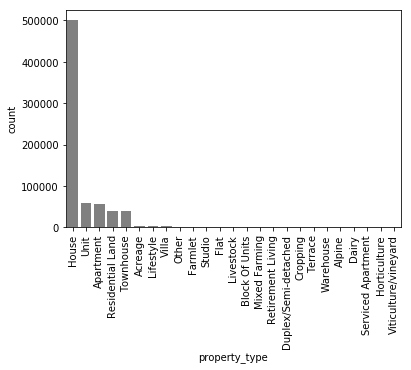

In [60]:
sb.countplot(data=clean, x='property_type',color='gray', order=clean.property_type.value_counts().index)
plt.xticks(rotation=90);

3 bedroom properties are the most common type sold on the website, after that comes 4 and 2 bedroom properties.

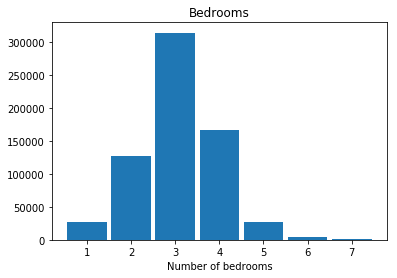

In [61]:
plt.hist(data=clean, x='beds', bins=np.arange(.5,8.5,1), rwidth=.9)
plt.xlabel('Number of bedrooms')
plt.title('Bedrooms');

The majority of properties have 1 or 2 bathrooms.

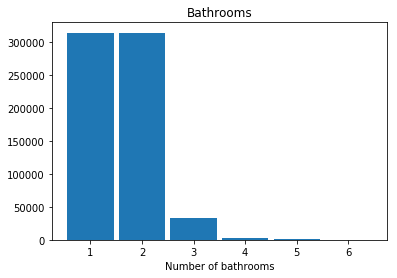

In [62]:
plt.hist(data=clean, x='baths', bins=np.arange(.5,7.5,1), rwidth=.9);
plt.xlabel('Number of bathrooms')
plt.title('Bathrooms');

Most properties have 1 or 2 car park spaces, the values for 3 and more car parks may not be very accurate as the definition of car park varies based on the advertisers perspective, some assume the maximum number of cars that can be parked on the property and some assume the designed car parks and garages.

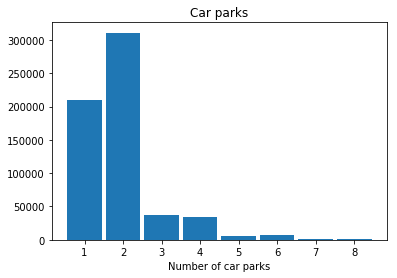

In [63]:
plt.hist(data=clean, x='cars', bins=np.arange(.5,9.5,1), rwidth=.9);
plt.xlabel('Number of car parks')
plt.title('Car parks');

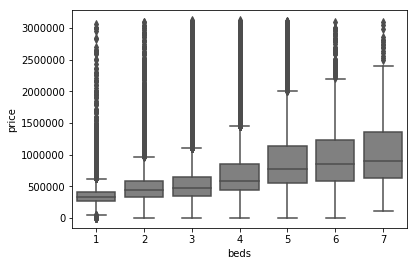

In [64]:
sb.boxplot(data = clean[(clean.beds>0) & (clean.price>0)], x = 'beds', y = 'price', color='gray');

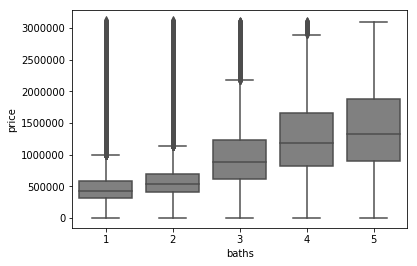

In [65]:
sb.boxplot(data = clean[(clean.baths>0) & (clean.price>0)], x = 'baths', y = 'price', color='gray');

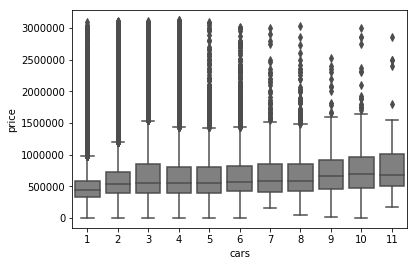

In [66]:
sb.boxplot(data = clean[(clean.cars>0) & (clean.price>0)], x = 'cars', y = 'price', color='gray');

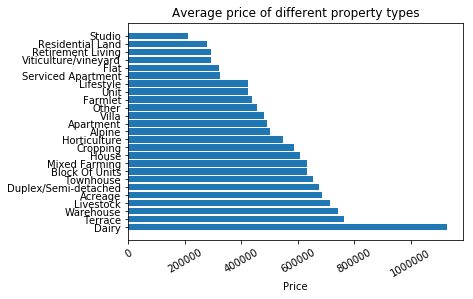

In [67]:
#clean[clean.price>0].groupby(['property_type']).price.mean().sort_values(ascending=False)
plt.barh(y=clean[clean.price>0].groupby(['property_type']).price.mean().sort_values(ascending=False).index,
        width=clean[clean.price>0].groupby(['property_type']).price.mean().sort_values(ascending=False))
plt.xticks(rotation=30);
plt.title('Average price of different property types')
plt.xlabel('Price');

It's interesting that average townhouse price is more than average house price. Probabely because townhouses are built in more expensive suburbs where property prices are high enough to make building multiple townhouses instead of 1 house economical.

The figure below show the price distribution, as the majority of properties are priced less than 3 million we will zoom in a bit to see what's going on.

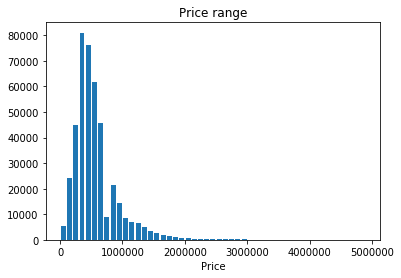

In [68]:
plt.hist(data=clean, x='price', bins=np.arange(1000,5000000,100000), rwidth=.8);
plt.xlabel('Price')
plt.title('Price range');

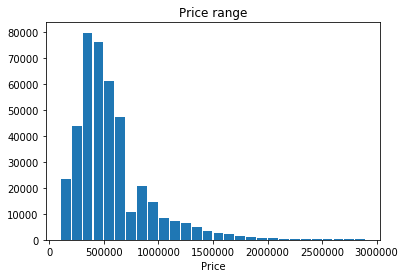

In [69]:
plt.hist(data=clean, x ='price', bins=np.arange(100000, 3000000, 100000), rwidth=.9);
plt.xlabel('Price')
plt.title('Price range');

The largest price bin for all properties is 350000 to 450000 and the distribution is skewd to the right.  
Interestingly there is a gap in the 700000 to 800000 price range, it appears that 700's is not a popular bracket to price a property.

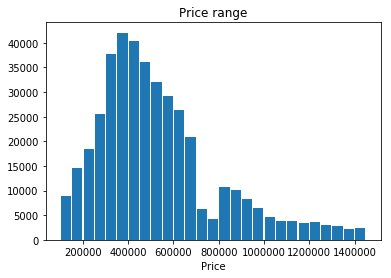

In [70]:
plt.hist(data=clean, x ='price', bins=np.arange(100000, 1500000, 50000), rwidth=.9);
plt.xlabel('Price')
plt.title('Price range');

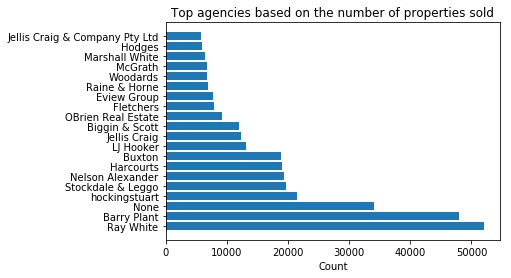

In [71]:
plt.barh(y= clean.agency.value_counts()[:20].index, width=clean.agency.value_counts()[:20])
plt.title('Top agencies based on the number of properties sold')
plt.xlabel('Count');

Ray White and Barry Plant have got the lead by a large margin and are the top real estate agencies in Victoria

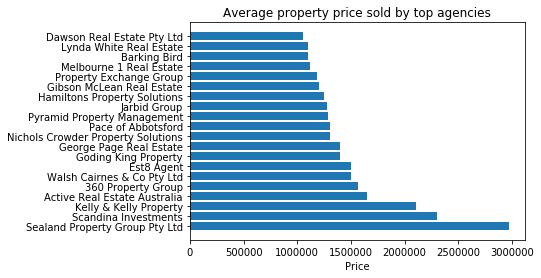

In [72]:
plt.barh(y= (clean[clean.price>0].groupby(['agency']).price.mean()/clean[clean.price>0]
             .groupby(['agency']).price.count()).sort_values(ascending=False)[:20].index, 
         width=(clean[clean.price>0].groupby(['agency']).price.mean()/clean[clean.price>0]
                .groupby(['agency']).price.count()).sort_values(ascending=False)[:20]);
plt.title('Average property price sold by top agencies')
plt.xlabel('Price');

This chart excludes the properties with no sold price, therefor the metrics are affected comparing to the previous chart.

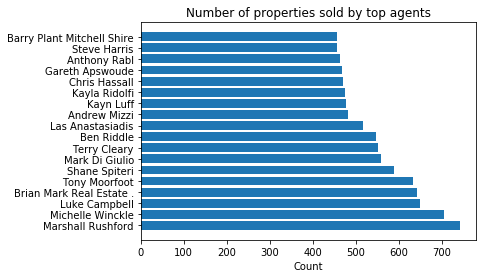

In [73]:
plt.barh(y= clean.agent_name.value_counts()[2:20].index, width=clean.agent_name.value_counts()[2:20])
plt.title('Number of properties sold by top agents')
plt.xlabel('Count');

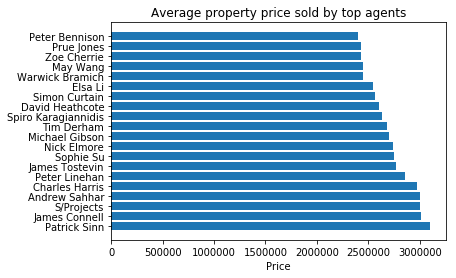

In [74]:
plt.barh(y= (clean[clean.price>0].groupby(['agent_name']).price.mean()/clean[clean.price>0]
             .groupby(['agent_name']).price.count()).sort_values(ascending=False)[:20].index, 
         width=(clean[clean.price>0].groupby(['agent_name']).price.mean()/clean[clean.price>0]
                .groupby(['agent_name']).price.count()).sort_values(ascending=False)[:20]);
plt.title('Average property price sold by top agents')
plt.xlabel('Price');

This chart may not be the best repsentative of real estate agents as by selling only one property with a very high price the agent can get on top of this chart. I belive number of properties sold is the better estimator.

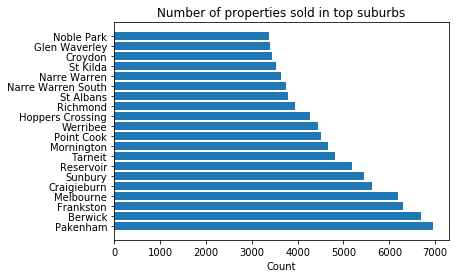

In [75]:
plt.barh(y= clean.suburb.value_counts()[:20].index, width=clean.suburb.value_counts()[:20])
plt.title('Number of properties sold in top suburbs')
plt.xlabel('Count');

The top 3 most active suburbs based on the number of properties sold are all in the same area in south eastern Melbourne suburbs. It raises the question, what was or is going on in these suburbs? Are they being developed? What makes them so special that so many properties are being sold there?

Perhaps later on I can make a heat map on top of the actual map of Melbourne to visualise and connect the numbers to actual locations on the map.

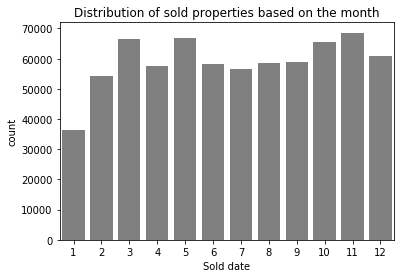

In [76]:
sb.countplot(data=clean, x=clean.sold_date.apply(lambda x : x.month),color='gray')
plt.xlabel('Sold date');
plt.title('Distribution of sold properties based on the month');

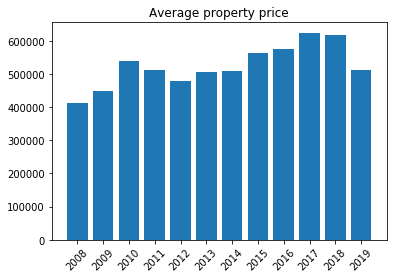

In [77]:
plt.bar(x=clean[clean.price>0].year.value_counts().index.sort_values()[-12:],
        height=clean[clean.price>0].groupby(['year']).price.mean()[-12:])
plt.xticks(np.arange(2008,2020,1),rotation=45);
plt.title('Average property price');

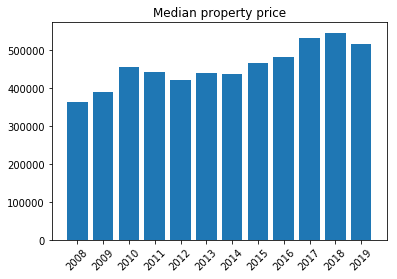

In [78]:
plt.bar(x=clean[clean.price>0].year.value_counts().index.sort_values()[-12:],
        height=clean[clean.price>0].groupby(['year']).price.median()[-12:])
plt.xticks(np.arange(2008,2020,1),rotation=45);
plt.title('Median property price');

This chart shows very interesting insights into properties price fluctuations during the year, as we can see in the chart avergae and median property prices are both significantly lower in January each year. If we compare that to March, 2 month later, the difference is roughly 20% cheaper which is huge.

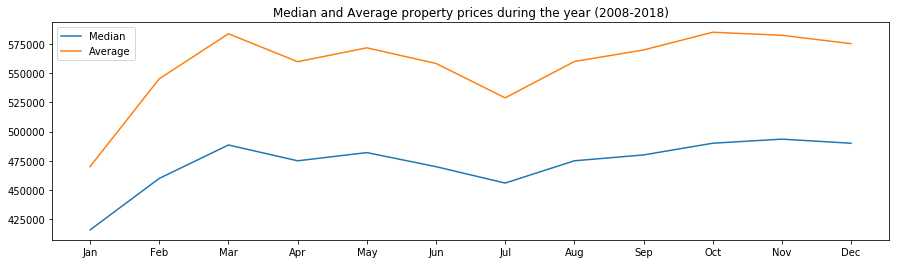

In [79]:
tt1 = clean[(clean.price>0)].query('sold_date>"2007-12-31" & sold_date<"2019-01-01"').copy()
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)
ax.plot(tt1.groupby(['month']).price.median());
ax.plot(tt1.groupby(['month']).price.mean());
plt.title('Median and Average property prices during the year (2008-2018)')
plt.legend(['Median','Average'])
plt.xticks(np.arange(1,13,1),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);

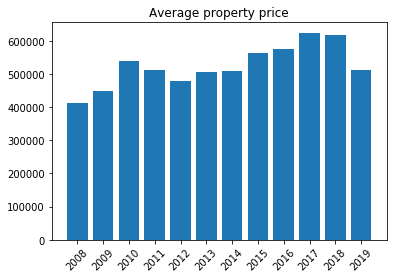

In [80]:
plt.bar(x=clean[clean.price>0].year.value_counts().index.sort_values()[-12:],
        height=clean[clean.price>0].groupby(['year']).price.mean()[-12:])
plt.xticks(np.arange(2008,2020,1),rotation=45);
plt.title('Average property price');

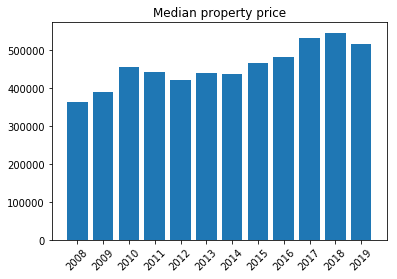

In [81]:
plt.bar(x=clean[clean.price>0].year.value_counts().index.sort_values()[-12:],
        height=clean[clean.price>0].groupby(['year']).price.median()[-12:])
plt.xticks(np.arange(2008,2020,1),rotation=45);
plt.title('Median property price');

Comparing price trends between 2 or more subsets can give us excellent insight. Therefor I'll compare different subsets of the dataset that I think can be interestin to compare in the following charts.

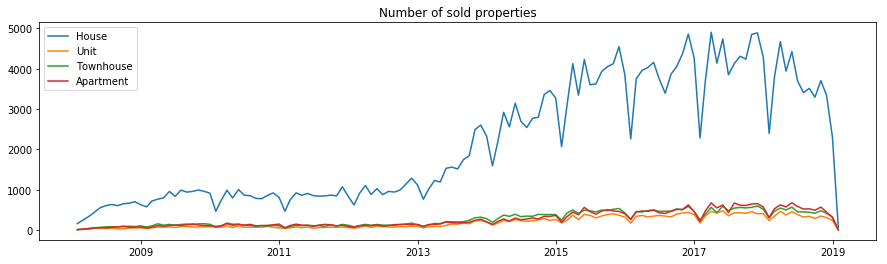

In [82]:
tt1 = clean[(clean.price>0) &(clean.property_type=='House')].query('sold_date>"2007-12-31"').copy()
tt2 = clean[(clean.price>0) &(clean.property_type=='Townhouse')].query('sold_date>"2007-12-31"').copy()
tt3 = clean[(clean.price>0) &(clean.property_type=='Unit')].query('sold_date>"2007-12-31"').copy()
tt4 = clean[(clean.price>0) &(clean.property_type=='Apartment')].query('sold_date>"2007-12-31"').copy()
grouped1 = tt1.set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped2 = tt2.set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped3 = tt3.set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped4 = tt4.set_index('sold_date').groupby(pd.TimeGrouper('M'))
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)
ax.plot(grouped1.price.count().dropna());
ax.plot(grouped2.price.count().dropna());
ax.plot(grouped3.price.count().dropna());
ax.plot(grouped4.price.count().dropna());
plt.title('Number of sold properties')
plt.legend(['House','Unit', 'Townhouse','Apartment']);

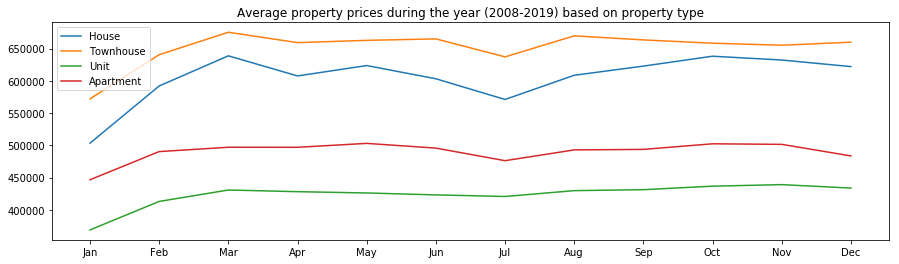

In [83]:
tt1 = clean[(clean.price>0) &(clean.property_type=='House')].query('sold_date>"2007-12-31"').copy()
tt2 = clean[(clean.price>0) &(clean.property_type=='Townhouse')].query('sold_date>"2007-12-31"').copy()
tt3 = clean[(clean.price>0) &(clean.property_type=='Unit')].query('sold_date>"2007-12-31"').copy()
tt4 = clean[(clean.price>0) &(clean.property_type=='Apartment')].query('sold_date>"2007-12-31"').copy()
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)
ax.plot(tt1.groupby(['month']).price.mean());
ax.plot(tt2.groupby(['month']).price.mean());
ax.plot(tt3.groupby(['month']).price.mean());
ax.plot(tt4.groupby(['month']).price.mean());
plt.title('Average property prices during the year (2008-2019) based on property type')
plt.legend(['House','Townhouse','Unit','Apartment'])
plt.xticks(np.arange(1,13,1),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);

First let's take a look at the price trend between 2 suburbs that I know and have lived before.

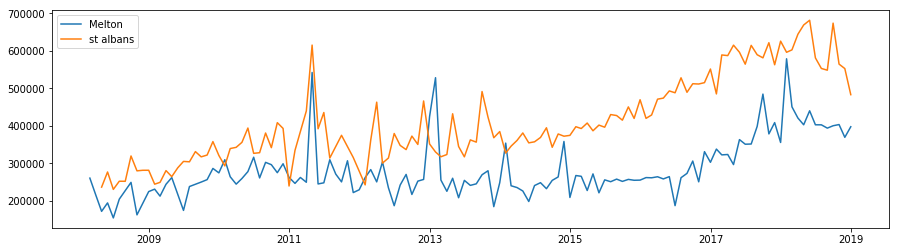

In [84]:
tt1 = clean[(clean.price>0) & (clean.suburb=='Melton')].query('sold_date>"2007-12-31"').copy()
tt2 = clean[(clean.price>0) & (clean.suburb=='St Albans')].query('sold_date>"2007-12-31"').copy()
grouped1 = tt1.set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped2 = tt2.set_index('sold_date').groupby(pd.TimeGrouper('M'))
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)
ax.plot(grouped1.price.mean().dropna());
ax.plot(grouped2.price.mean().dropna());
plt.legend(['Melton','st albans']);

The number of sold houses is far larger than any other residential property type and it has grown over the years.

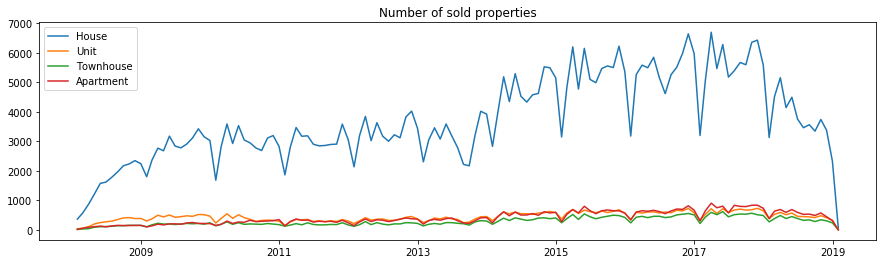

In [85]:
tt1 = clean[(clean.property_type=='House')].query('sold_date>"2007-12-31"').copy()
tt2 = clean[(clean.property_type=='Unit')].query('sold_date>"2007-12-31"').copy()
tt3 = clean[(clean.property_type=='Townhouse')].query('sold_date>"2007-12-31"').copy()
tt4 = clean[(clean.property_type=='Apartment')].query('sold_date>"2007-12-31"').copy()
grouped1 = tt1.set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped2 = tt2.set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped3 = tt3.set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped4 = tt4.set_index('sold_date').groupby(pd.TimeGrouper('M'))
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)
ax.plot(grouped1.price.count().dropna());
ax.plot(grouped2.price.count().dropna());
ax.plot(grouped3.price.count().dropna());
ax.plot(grouped4.price.count().dropna());
plt.title('Number of sold properties')
plt.legend(['House','Unit', 'Townhouse','Apartment']);

Appears Units, Townhoueses and Houses are pretty correlated.

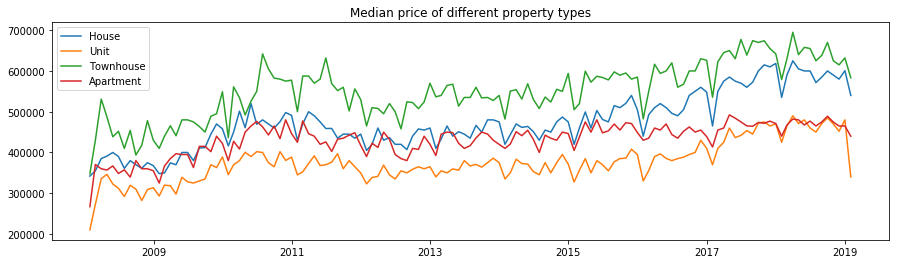

In [86]:
tt1 = clean[(clean.price>0) & (clean.property_type=='House')].query('sold_date>"2007-12-31"').copy()
tt2 = clean[(clean.price>0) & (clean.property_type=='Unit')].query('sold_date>"2007-12-31"').copy()
tt3 = clean[(clean.price>0) & (clean.property_type=='Townhouse')].query('sold_date>"2007-12-31"').copy()
tt4 = clean[(clean.price>0) & (clean.property_type=='Apartment')].query('sold_date>"2007-12-31"').copy()
grouped1 = tt1.set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped2 = tt2.set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped3 = tt3.set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped4 = tt4.set_index('sold_date').groupby(pd.TimeGrouper('M'))
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111)
ax.plot(grouped1.price.median().dropna());
ax.plot(grouped2.price.median().dropna());
ax.plot(grouped3.price.median().dropna());
ax.plot(grouped4.price.median().dropna());
plt.title('Median price of different property types')
plt.legend(['House','Unit', 'Townhouse','Apartment']);

This below chart show the average price of different property types as the number of bedrooms change. We can clearly see in 2 bedroom properties, all 3 major property types are in the same ball park excep Unit which is slightly cheaper on average.
It is in 3 bedrooms properties that the averages really change, we can clearly see the average price for 3 bedrooms properties is highest for Apartment, then Townhouse, then House and finally Units.

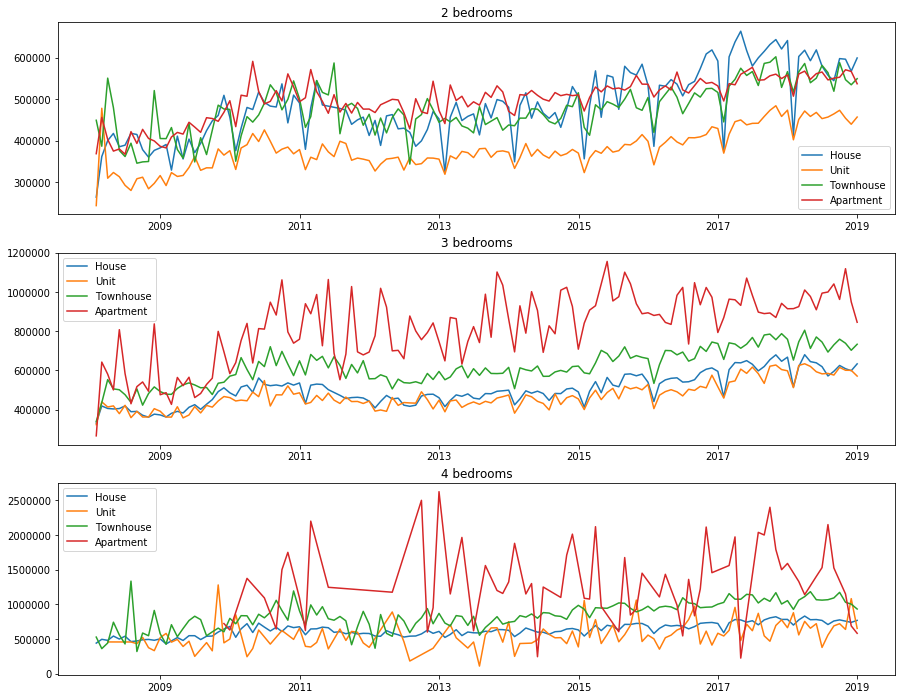

In [87]:
tt1 = clean[(clean.price>0) & (clean.property_type=='House')].query('sold_date>"2007-12-31" & sold_date<"2019-01-01"').copy()
tt2 = clean[(clean.price>0) & (clean.property_type=='Unit')].query('sold_date>"2007-12-31" & sold_date<"2019-01-01"').copy()
tt3 = clean[(clean.price>0) & (clean.property_type=='Townhouse')].query('sold_date>"2007-12-31" & sold_date<"2019-01-01"').copy()
tt4 = clean[(clean.price>0) & (clean.property_type=='Apartment')].query('sold_date>"2007-12-31" & sold_date<"2019-01-01"').copy()
grouped1 = tt1[tt1.beds==2].set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped2 = tt2[tt2.beds==2].set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped3 = tt3[tt3.beds==2].set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped4 = tt4[tt4.beds==2].set_index('sold_date').groupby(pd.TimeGrouper('M'))
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(311)
ax.plot(grouped1.price.mean().dropna());
ax.plot(grouped2.price.mean().dropna());
ax.plot(grouped3.price.mean().dropna());
ax.plot(grouped4.price.mean().dropna());
plt.title('2 bedrooms')
plt.legend(['House','Unit', 'Townhouse', 'Apartment']);
grouped1 = tt1[tt1.beds==3].set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped2 = tt2[tt2.beds==3].set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped3 = tt3[tt3.beds==3].set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped4 = tt4[tt4.beds==3].set_index('sold_date').groupby(pd.TimeGrouper('M'))
az = fig.add_subplot(312)
az.plot(grouped1.price.mean().dropna());
az.plot(grouped2.price.mean().dropna());
az.plot(grouped3.price.mean().dropna());
az.plot(grouped4.price.mean().dropna());
plt.title('3 bedrooms')
plt.legend(['House','Unit', 'Townhouse', 'Apartment']);
grouped1 = tt1[tt1.beds==4].set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped2 = tt2[tt2.beds==4].set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped3 = tt3[tt3.beds==4].set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped4 = tt4[tt4.beds==4].set_index('sold_date').groupby(pd.TimeGrouper('M'))
ac = fig.add_subplot(313)
ac.plot(grouped1.price.mean().dropna());
ac.plot(grouped2.price.mean().dropna());
ac.plot(grouped3.price.mean().dropna());
ac.plot(grouped4.price.mean().dropna());
plt.title('4 bedrooms')
plt.legend(['House','Unit', 'Townhouse', 'Apartment']);

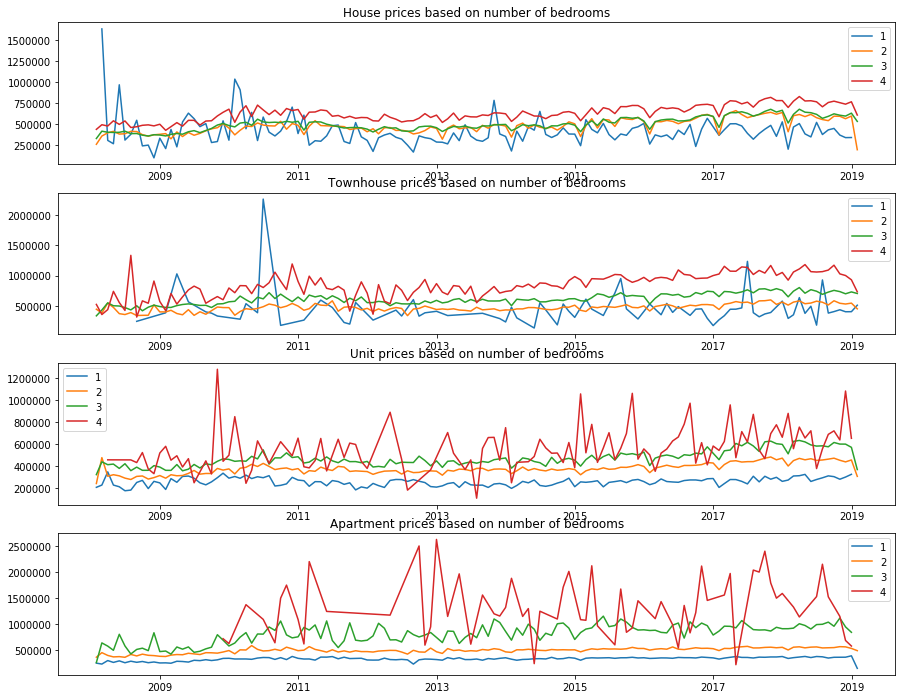

In [88]:
tt1 = clean[(clean.price>0) & (clean.beds==1)].query('sold_date>"2007-12-31"').copy()
tt2 = clean[(clean.price>0) & (clean.beds==2)].query('sold_date>"2007-12-31"').copy()
tt3 = clean[(clean.price>0) & (clean.beds==3)].query('sold_date>"2007-12-31"').copy()
tt4 = clean[(clean.price>0) & (clean.beds==4)].query('sold_date>"2007-12-31"').copy()
grouped1 = tt1[tt1.property_type=='House'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped2 = tt2[tt2.property_type=='House'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped3 = tt3[tt3.property_type=='House'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped4 = tt4[tt4.property_type=='House'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(411)
ax.plot(grouped1.price.mean().dropna());
ax.plot(grouped2.price.mean().dropna());
ax.plot(grouped3.price.mean().dropna());
ax.plot(grouped4.price.mean().dropna());
plt.title('House prices based on number of bedrooms')
plt.legend(['1','2', '3', '4']);
grouped1 = tt1[tt1.property_type=='Townhouse'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped2 = tt2[tt2.property_type=='Townhouse'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped3 = tt3[tt3.property_type=='Townhouse'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped4 = tt4[tt4.property_type=='Townhouse'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
az = fig.add_subplot(412)
az.plot(grouped1.price.mean().dropna());
az.plot(grouped2.price.mean().dropna());
az.plot(grouped3.price.mean().dropna());
az.plot(grouped4.price.mean().dropna());
plt.title('Townhouse prices based on number of bedrooms')
plt.legend(['1','2', '3', '4']);
grouped1 = tt1[tt1.property_type=='Unit'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped2 = tt2[tt2.property_type=='Unit'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped3 = tt3[tt3.property_type=='Unit'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped4 = tt4[tt4.property_type=='Unit'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
ac = fig.add_subplot(413)
ac.plot(grouped1.price.mean().dropna());
ac.plot(grouped2.price.mean().dropna());
ac.plot(grouped3.price.mean().dropna());
ac.plot(grouped4.price.mean().dropna());
plt.title('Unit prices based on number of bedrooms')
plt.legend(['1','2', '3', '4']);
grouped1 = tt1[tt1.property_type=='Apartment'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped2 = tt2[tt2.property_type=='Apartment'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped3 = tt3[tt3.property_type=='Apartment'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
grouped4 = tt4[tt4.property_type=='Apartment'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
av = fig.add_subplot(414)
av.plot(grouped1.price.mean().dropna());
av.plot(grouped2.price.mean().dropna());
av.plot(grouped3.price.mean().dropna());
av.plot(grouped4.price.mean().dropna());
plt.title('Apartment prices based on number of bedrooms')
plt.legend(['1','2', '3', '4']);

I'm going to calculate the average price increase in all suburbs between 2013 and 2018 and then pick the fastest growing ones to plot. Comparing the suburbs visually by looking at the charts would be challenging.

In [89]:
tem = pd.DataFrame()
tem['name'] = clean.groupby(['suburb']).address.count().index
dd = tem['name'].apply(lambda x : clean[clean.suburb==x].property_type.value_counts())
dd = dd.fillna(0)
tem['count_house'] = dd.House
tem['count_townhouse'] = dd.Townhouse
tem['count_unit'] = dd.Unit
tem['count_apartment'] = dd.Apartment

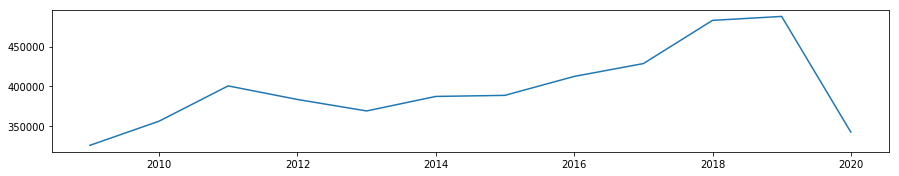

In [90]:

b = clean[(clean.price>0) & (clean.property_type=='Unit')].query('sold_date>"2007-12-31"').copy()
g = b.set_index('sold_date').groupby(pd.TimeGrouper('Y'))
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(411)
ax.plot(g.price.mean().dropna());

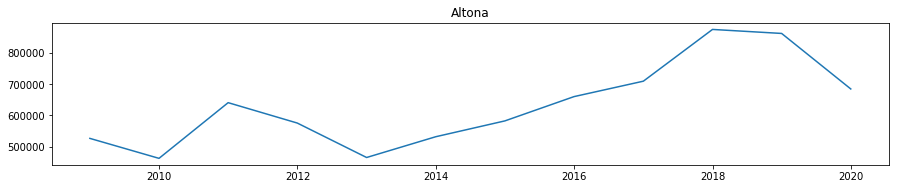

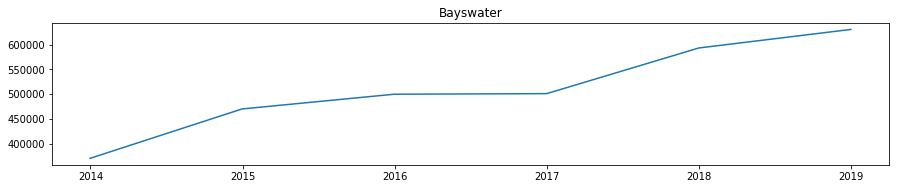

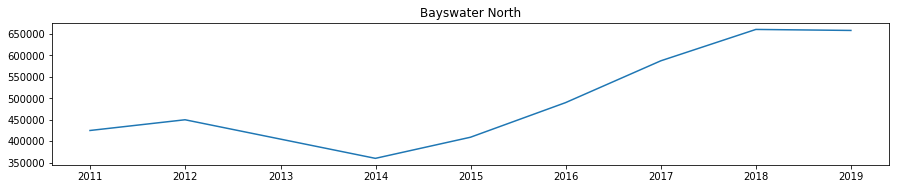

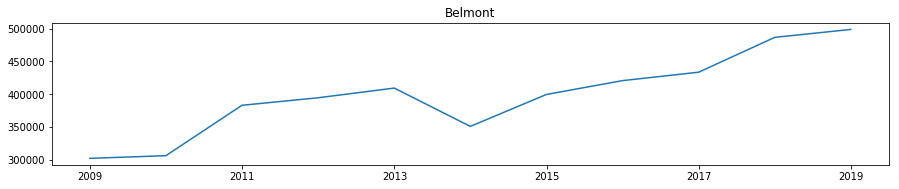

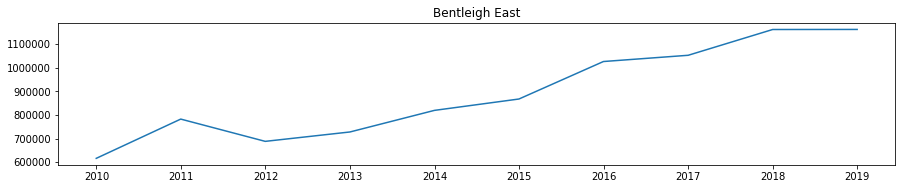

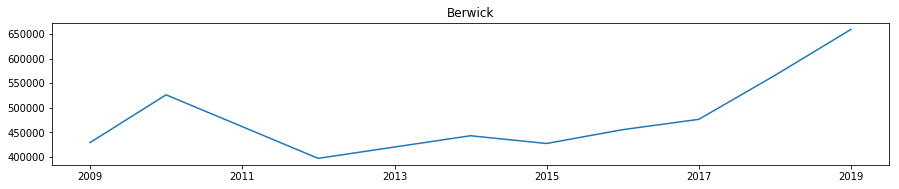

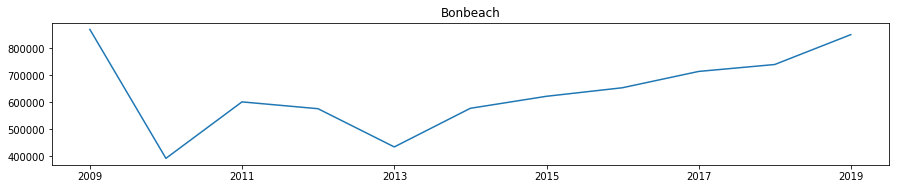

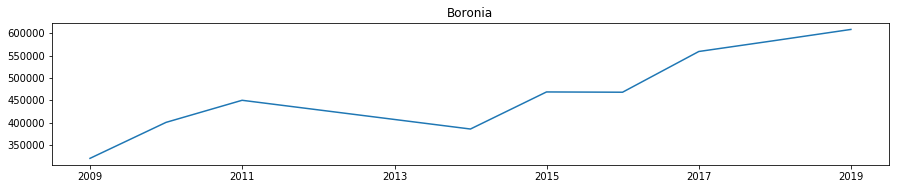

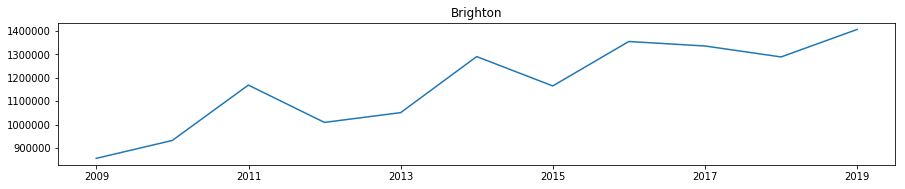

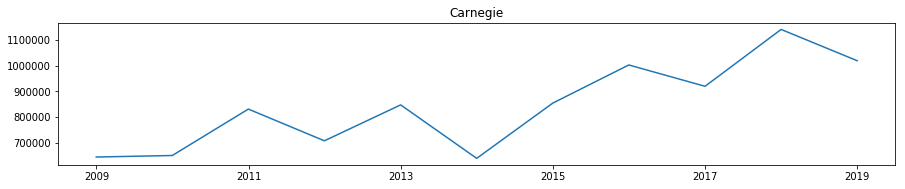

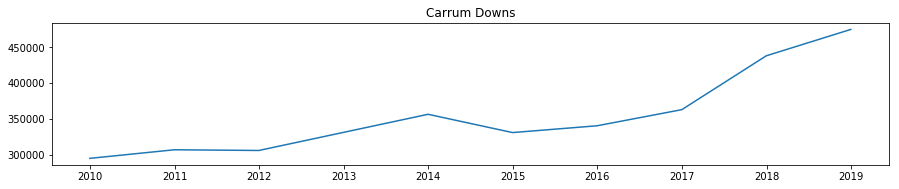

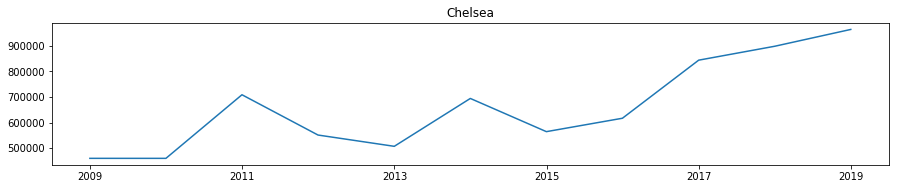

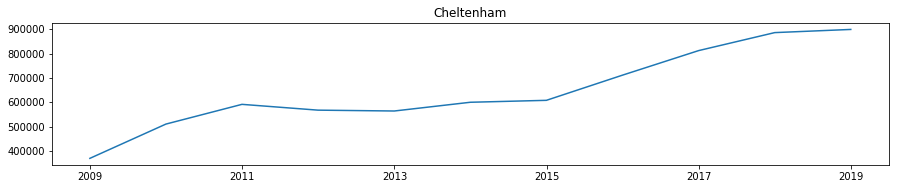

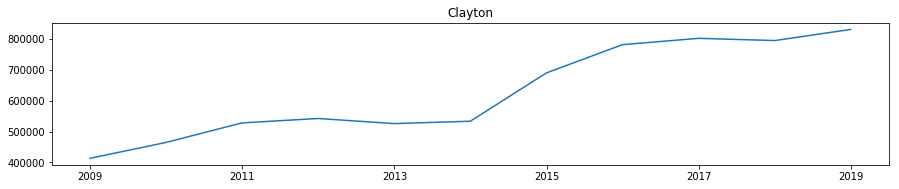

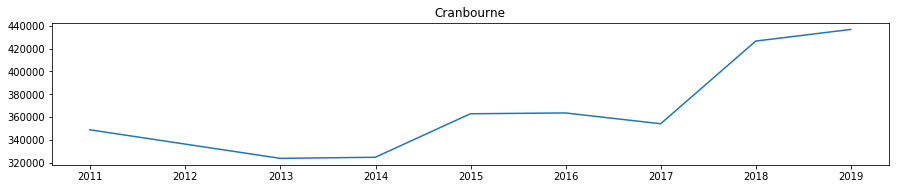

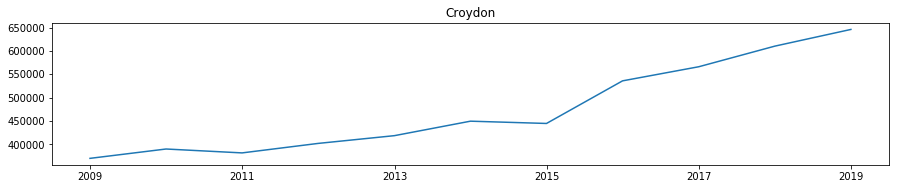

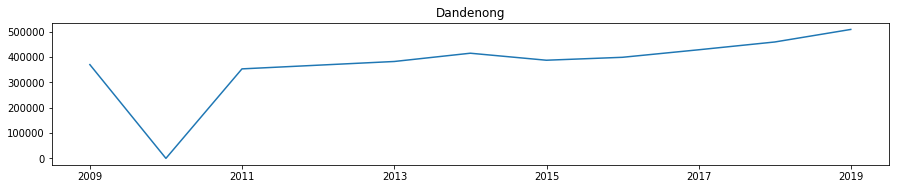

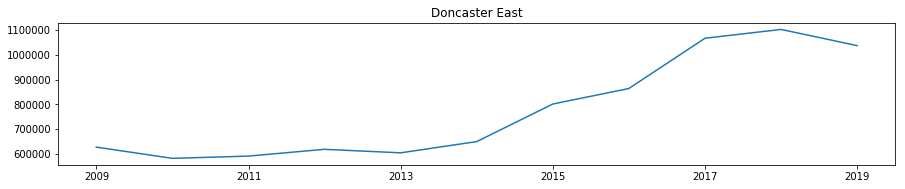

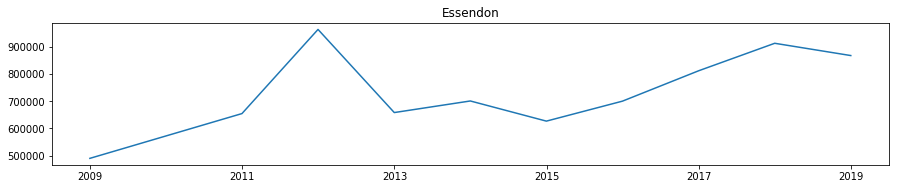

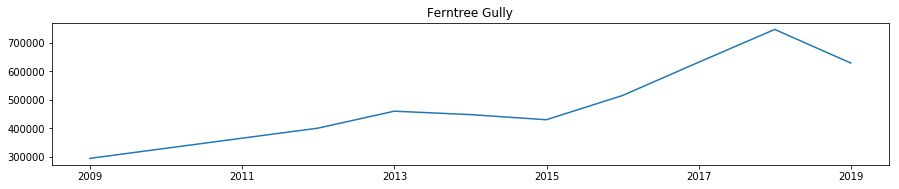

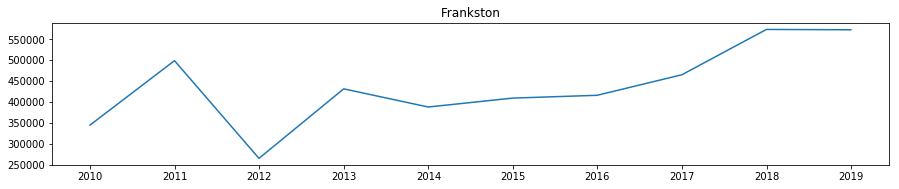

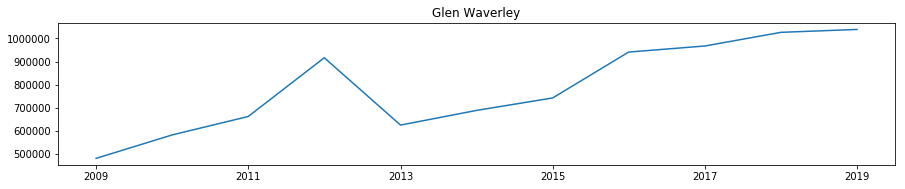

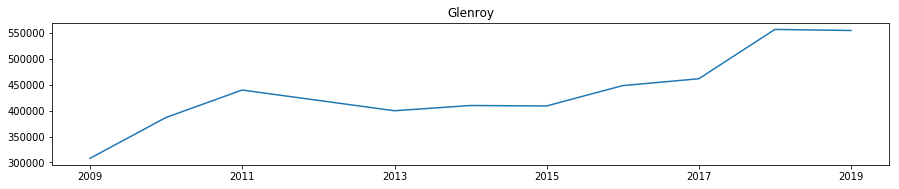

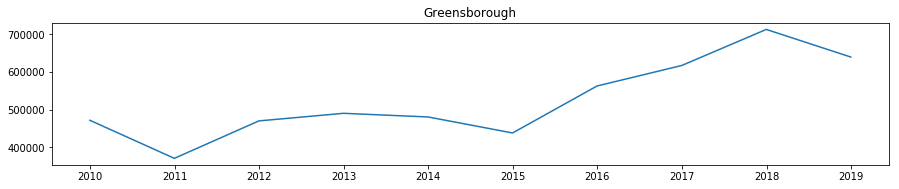

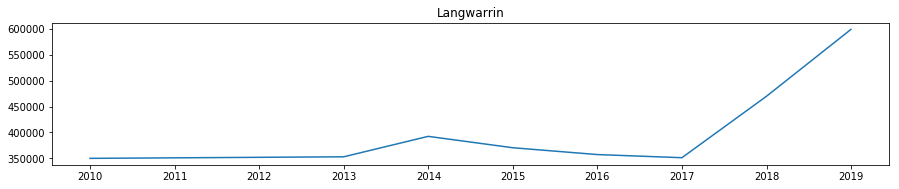

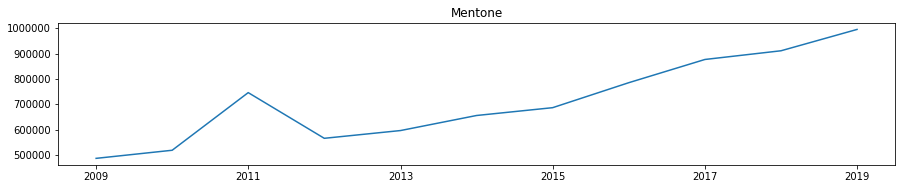

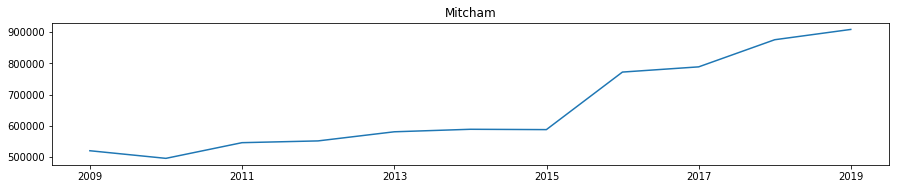

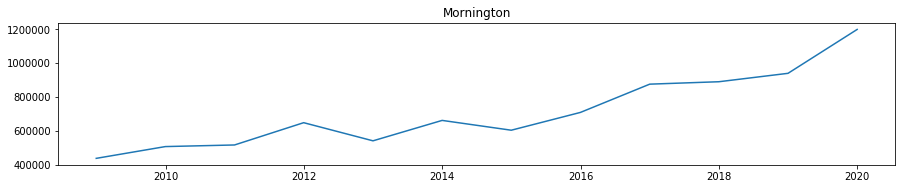

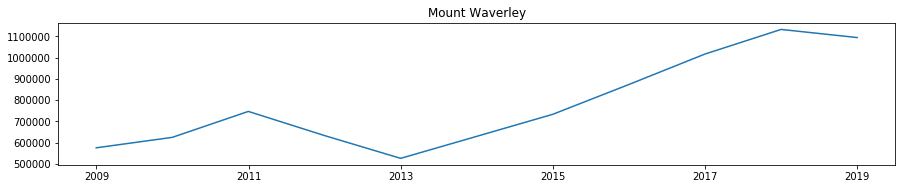

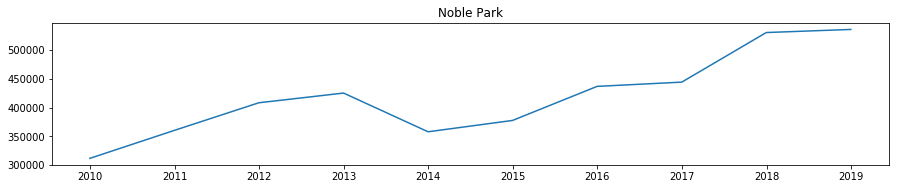

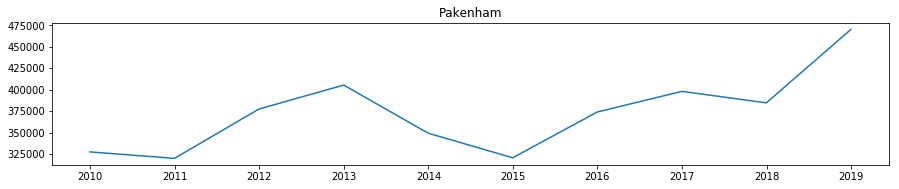

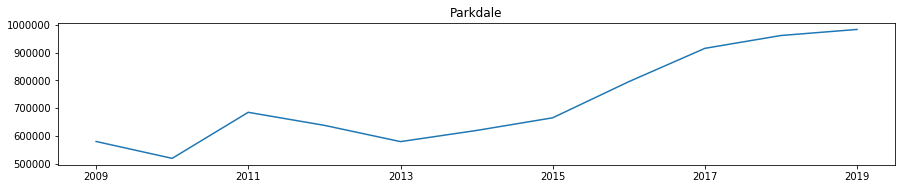

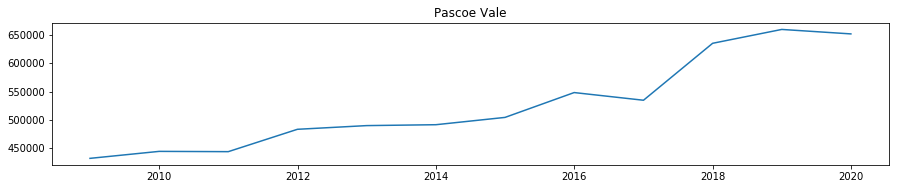

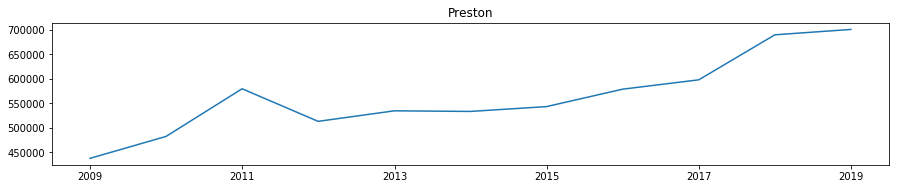

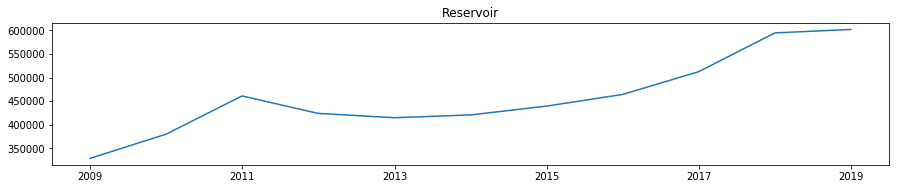

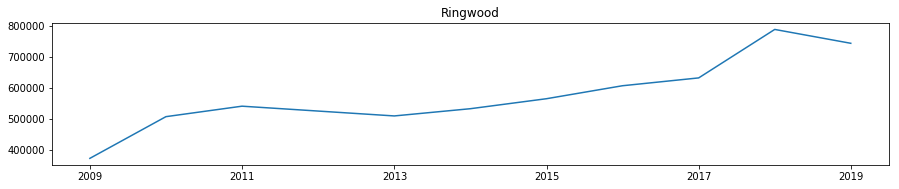

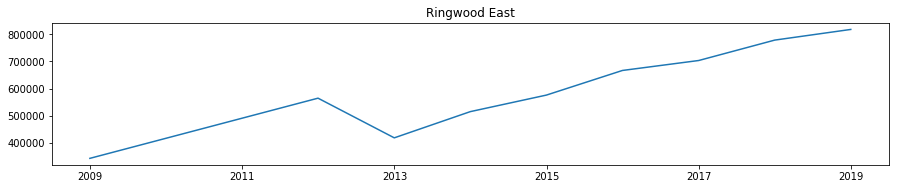

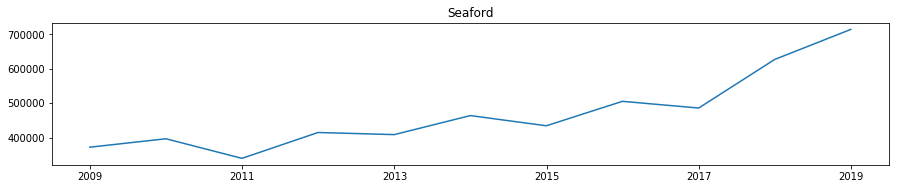

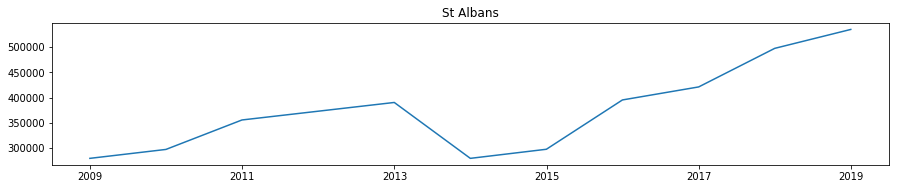

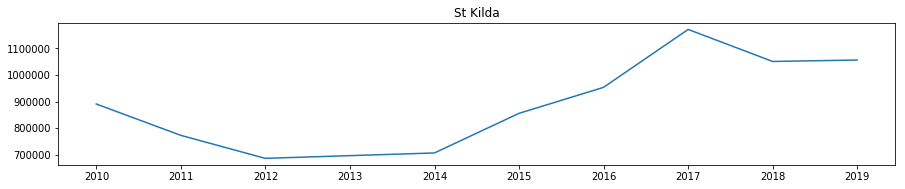

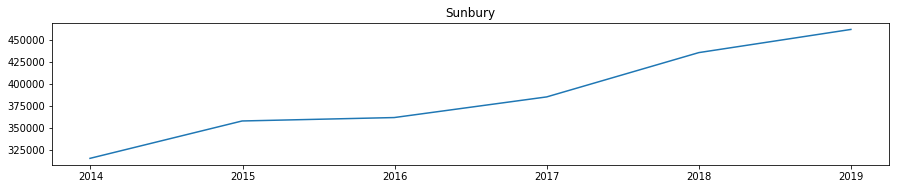

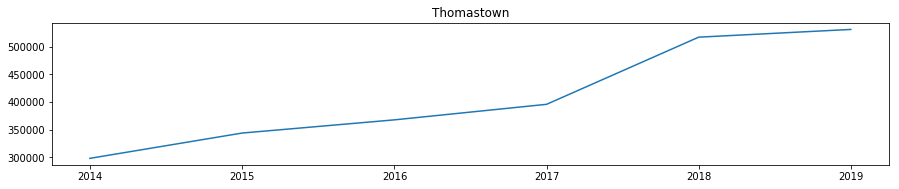

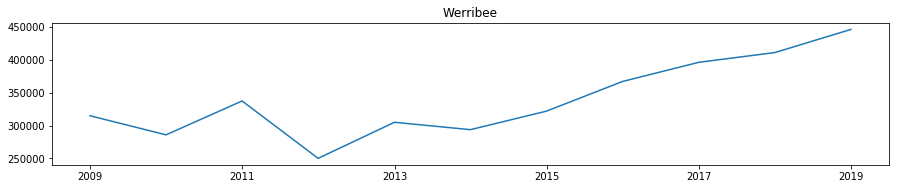

In [91]:
a = tem[tem.count_unit > 300]
for i in a['name']:
    b = clean[(clean.price>0) & (clean.property_type=='Townhouse') & (clean.suburb == i)].query('sold_date>"2007-12-31"').copy()
    g = b.set_index('sold_date').groupby(pd.TimeGrouper('Y'))
    fig = plt.figure(figsize=(15, 12))
    ax = fig.add_subplot(411)
    ax.plot(g.price.mean().dropna());
    plt.title(i)

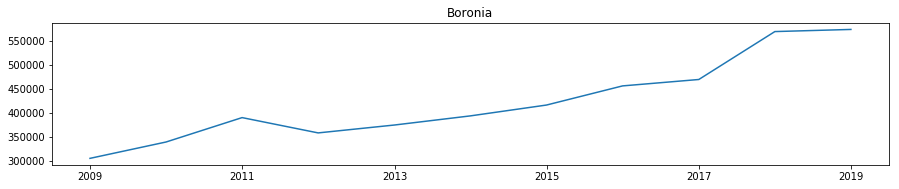

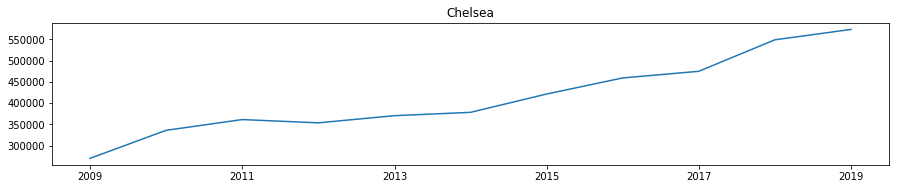

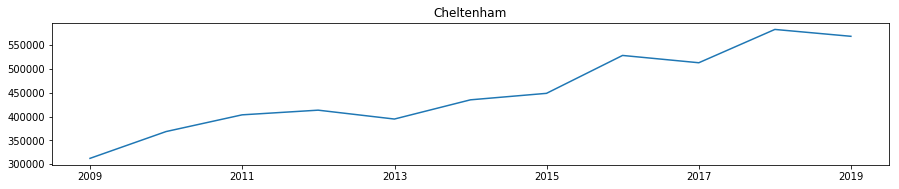

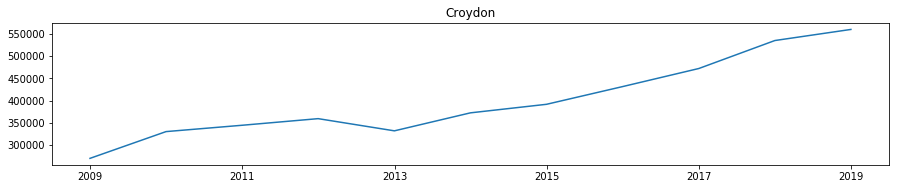

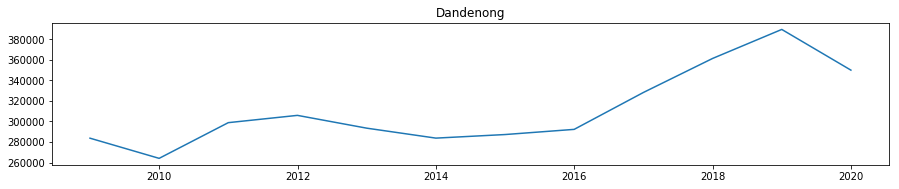

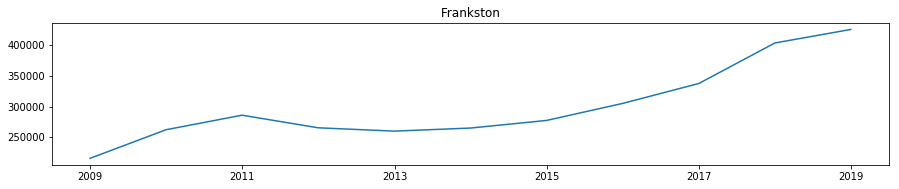

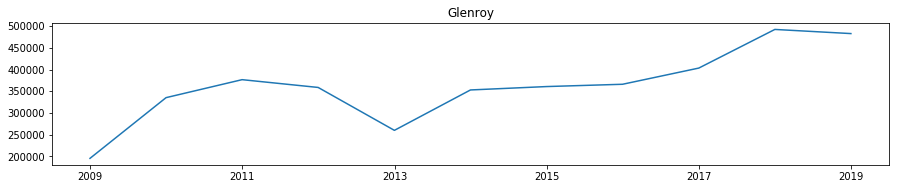

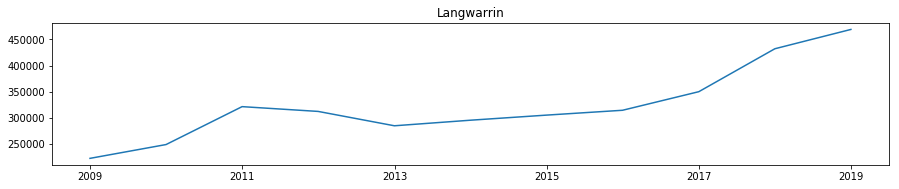

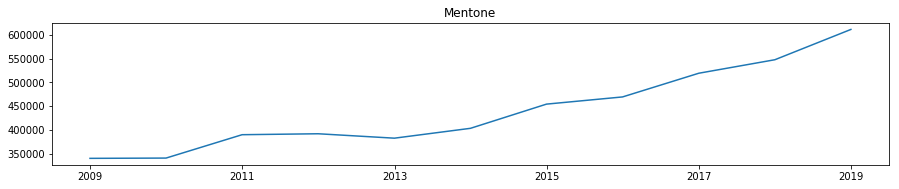

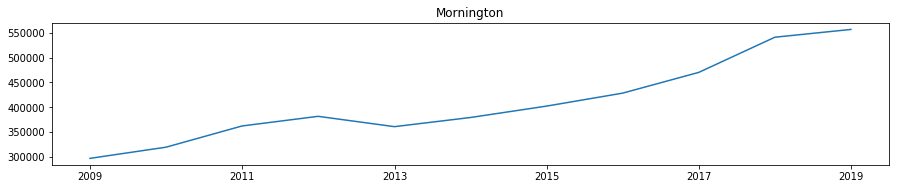

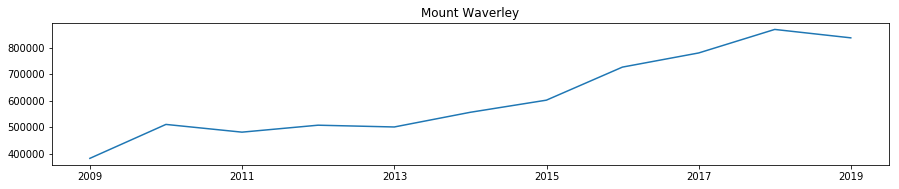

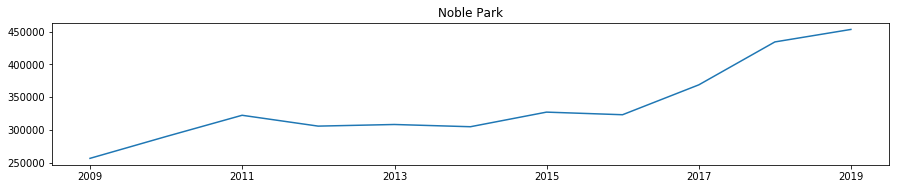

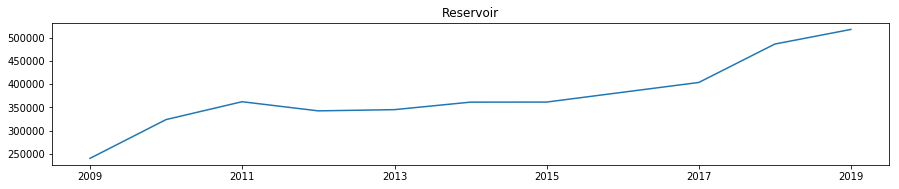

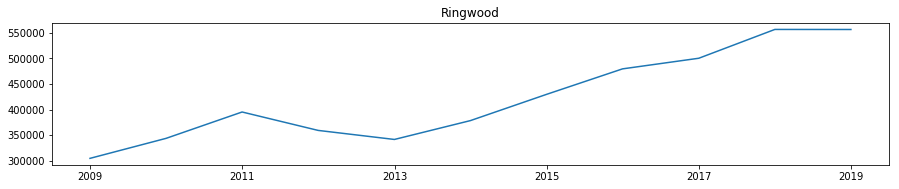

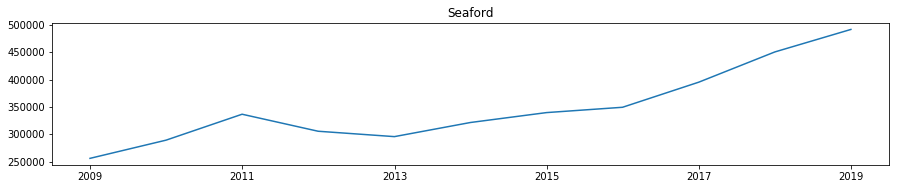

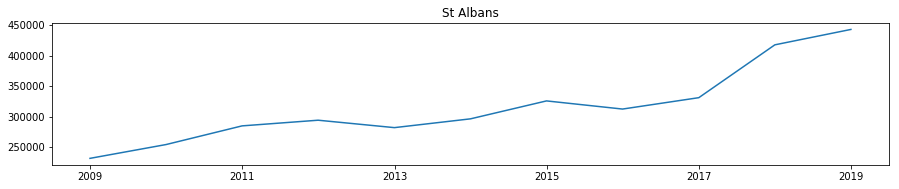

In [92]:
a = tem[tem.count_unit > 500]
for i in a['name']:
    b = clean[(clean.price>0) & (clean.property_type=='Unit') & (clean.suburb == i)].query('sold_date>"2007-12-31"').copy()
    g = b.set_index('sold_date').groupby(pd.TimeGrouper('Y'))
    fig = plt.figure(figsize=(15, 12))
    ax = fig.add_subplot(411)
    ax.plot(g.price.mean().dropna());
    plt.title(i)

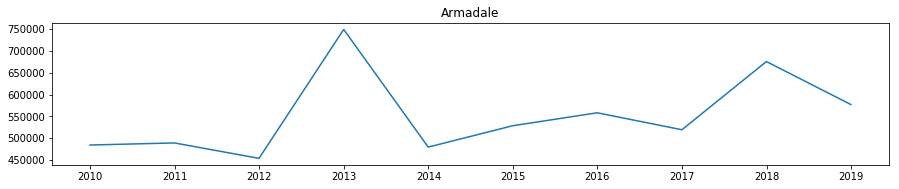

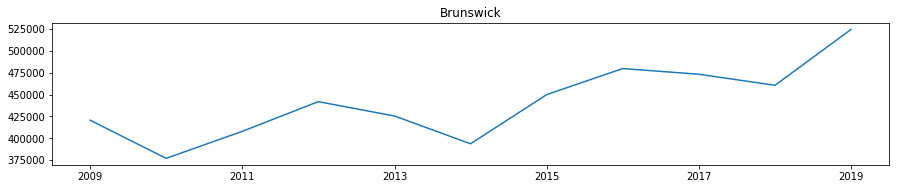

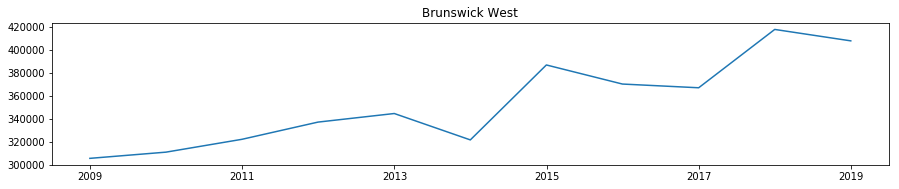

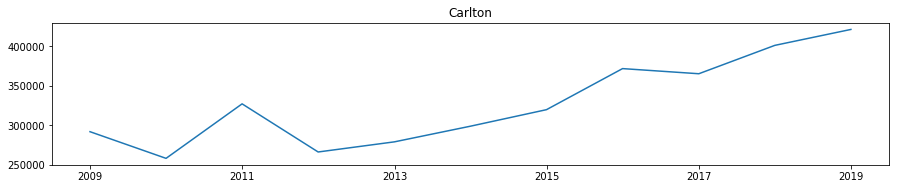

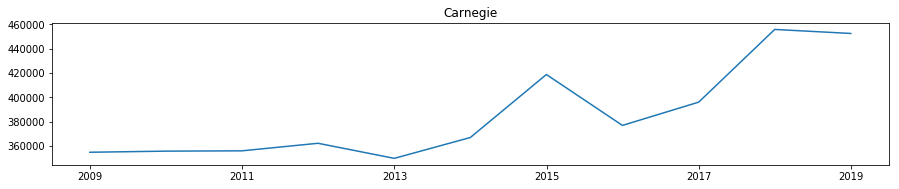

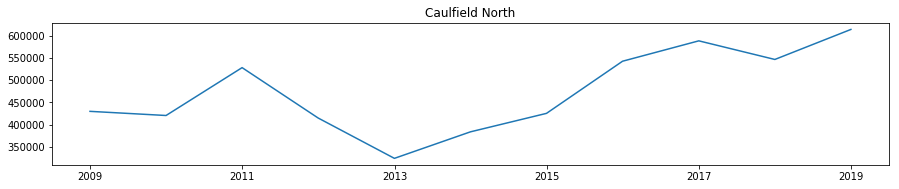

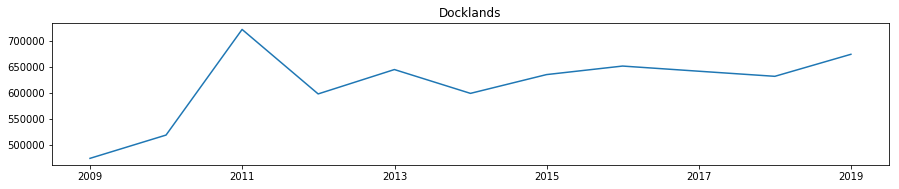

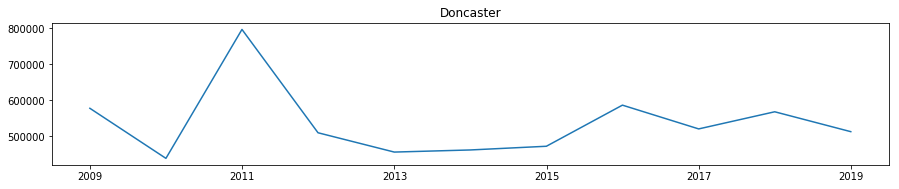

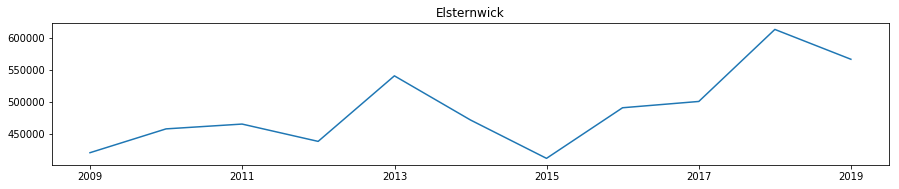

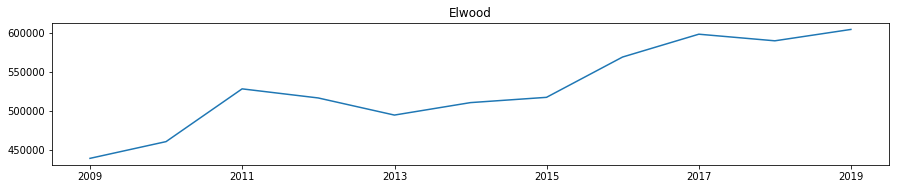

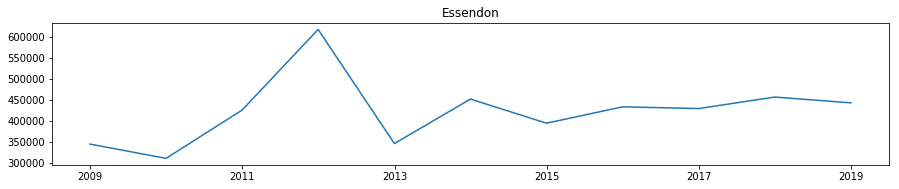

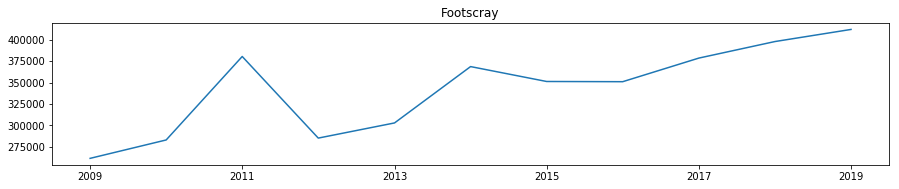

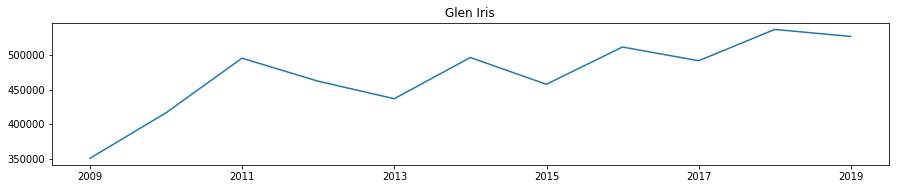

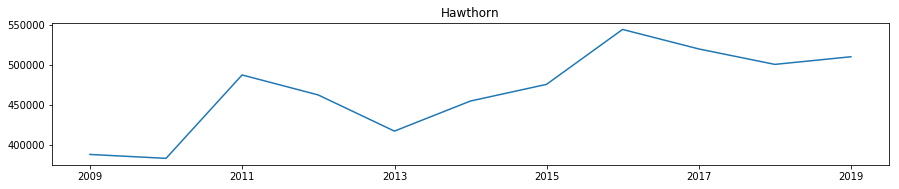

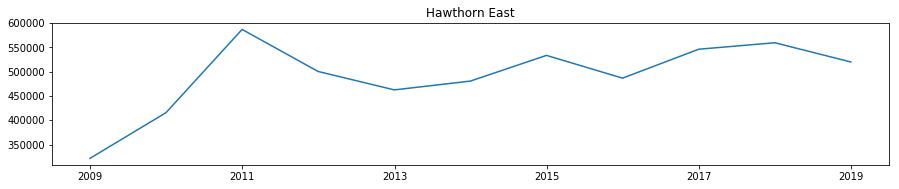

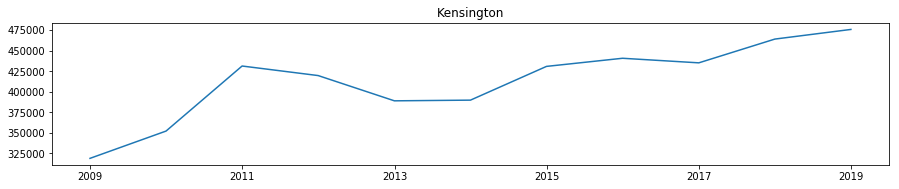

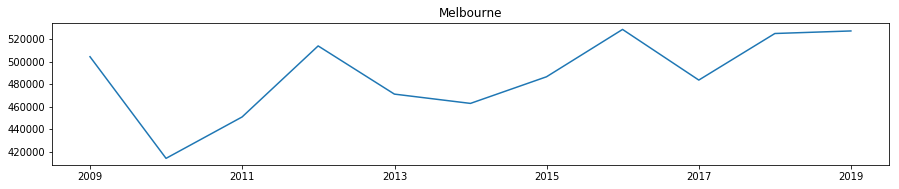

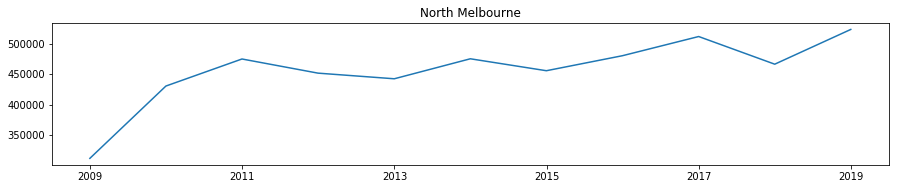

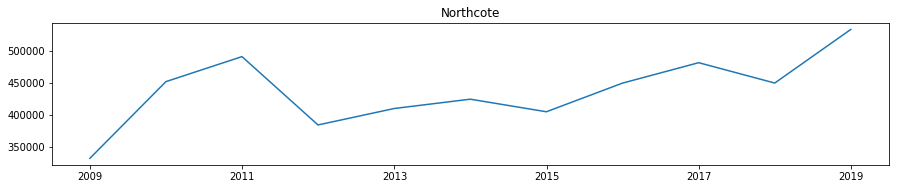

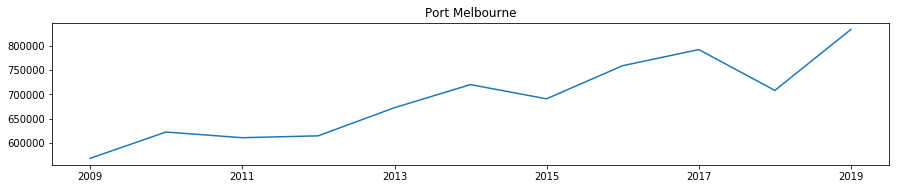

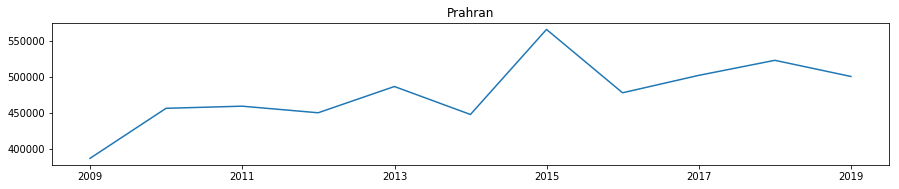

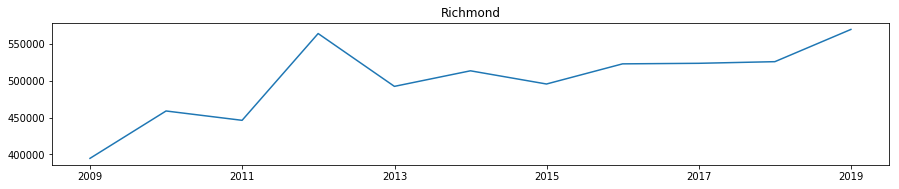

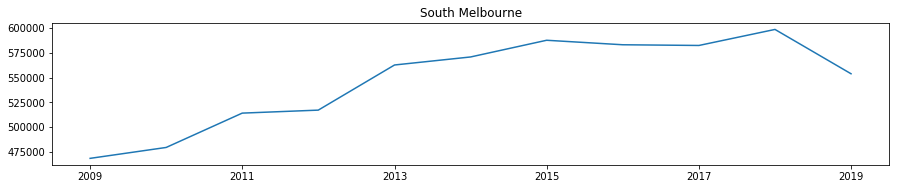

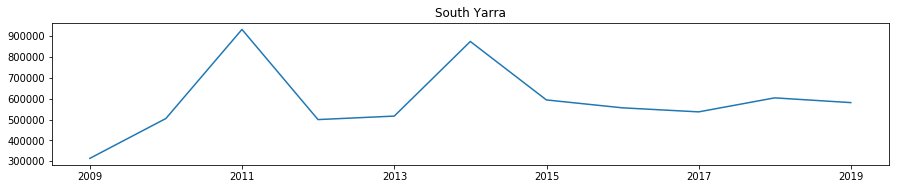

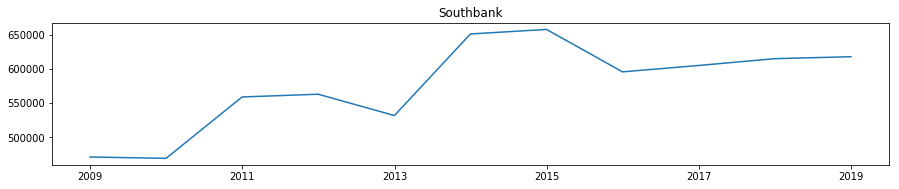

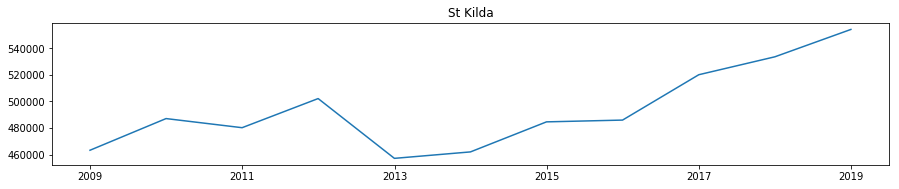

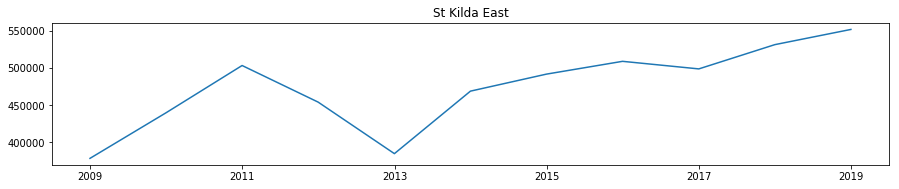

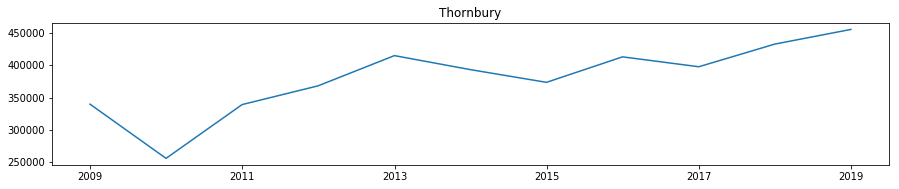

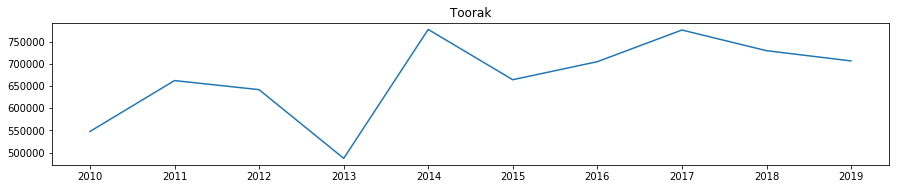

In [93]:
a = tem[tem.count_apartment>500]
for i in a['name']:
    b = clean[(clean.price>0) & (clean.property_type=='Apartment') & (clean.suburb == i)].query('sold_date>"2007-12-31"').copy()
    g = b.set_index('sold_date').groupby(pd.TimeGrouper('Y'))
    fig = plt.figure(figsize=(15, 12))
    ax = fig.add_subplot(411)
    ax.plot(g.price.mean().dropna());
    plt.title(i)


I'll make a function to make it easier to check out the price trends in different suburbs.

In [94]:
def plott(aa,bb,cc,dd):
    tt1 = clean[(clean.price>0) & (clean.suburb==aa)].query('sold_date>"2007-12-31"').copy()
    tt2 = clean[(clean.price>0) & (clean.suburb==bb)].query('sold_date>"2007-12-31"').copy()
    tt3 = clean[(clean.price>0) & (clean.suburb==cc)].query('sold_date>"2007-12-31"').copy()
    tt4 = clean[(clean.price>0) & (clean.suburb==dd)].query('sold_date>"2007-12-31"').copy()
    grouped1 = tt1[tt1.property_type=='House'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
    grouped2 = tt2[tt2.property_type=='House'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
    grouped3 = tt3[tt3.property_type=='House'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
    grouped4 = tt4[tt4.property_type=='House'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
    fig = plt.figure(figsize=(15, 12))
    ax = fig.add_subplot(411)
    ax.plot(grouped1.price.mean().dropna());
    ax.plot(grouped2.price.mean().dropna());
    ax.plot(grouped3.price.mean().dropna());
    ax.plot(grouped4.price.mean().dropna());
    plt.title('House')
    plt.legend([aa,bb,cc,dd]);
    grouped1 = tt1[tt1.property_type=='Unit'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
    grouped2 = tt2[tt2.property_type=='Unit'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
    grouped3 = tt3[tt3.property_type=='Unit'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
    grouped4 = tt4[tt4.property_type=='Unit'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
    az = fig.add_subplot(412)
    az.plot(grouped1.price.mean().dropna());
    az.plot(grouped2.price.mean().dropna());
    az.plot(grouped3.price.mean().dropna());
    az.plot(grouped4.price.mean().dropna());
    plt.title('Unit')
    plt.legend([aa,bb,cc,dd]);
    grouped1 = tt1[tt1.property_type=='Townhouse'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
    grouped2 = tt2[tt2.property_type=='Townhouse'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
    grouped3 = tt3[tt3.property_type=='Townhouse'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
    grouped4 = tt4[tt4.property_type=='Townhouse'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
    ac = fig.add_subplot(413)
    ac.plot(grouped1.price.mean().dropna());
    ac.plot(grouped2.price.mean().dropna());
    ac.plot(grouped3.price.mean().dropna());
    ac.plot(grouped4.price.mean().dropna());
    plt.title('Townhouse')
    plt.legend([aa,bb,cc,dd]);
    grouped1 = tt1[tt1.property_type=='Apartment'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
    grouped2 = tt2[tt2.property_type=='Apartment'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
    grouped3 = tt3[tt3.property_type=='Apartment'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
    grouped4 = tt4[tt4.property_type=='Apartment'].set_index('sold_date').groupby(pd.TimeGrouper('M'))
    ac = fig.add_subplot(414)
    ac.plot(grouped1.price.mean().dropna());
    ac.plot(grouped2.price.mean().dropna());
    ac.plot(grouped3.price.mean().dropna());
    ac.plot(grouped4.price.mean().dropna());
    plt.title('Apartment')
    plt.legend([aa,bb,cc,dd]);

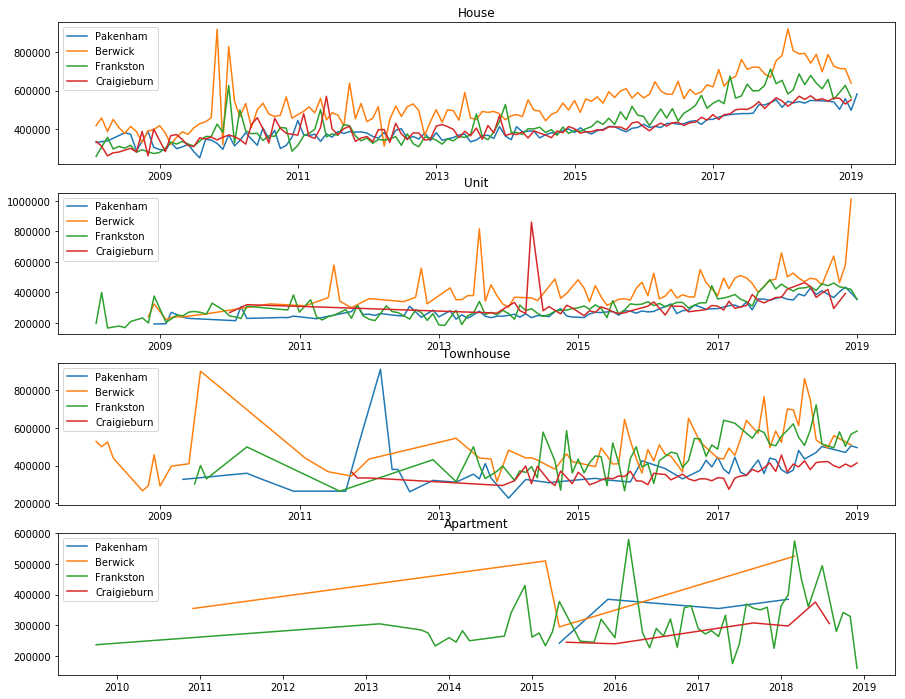

In [95]:
aa=clean.suburb.value_counts()[:20].index[0]
bb=clean.suburb.value_counts()[:20].index[1]
cc=clean.suburb.value_counts()[:20].index[2]
dd=clean.suburb.value_counts()[:20].index[4]
plott(aa,bb,cc,dd)

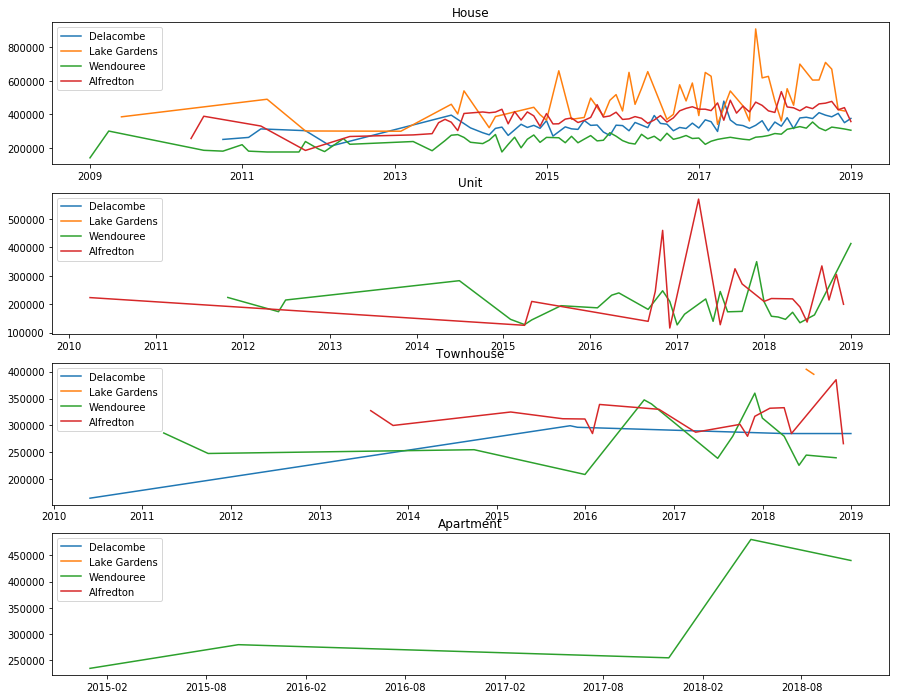

In [96]:
aa='Delacombe'
bb='Lake Gardens'
cc='Wendouree'
dd='Alfredton'
plott(aa,bb,cc,dd)

To compare suburbs with each other I'll pick the busiest suburbs based on number of properties sold, then I'll calculate the difference in property median price each year and average the differences while giving higher weights to recent years.

In [97]:
def average_property_growth(sub,ptype):
    return clean[(clean.suburb==sub) & (clean.price>10000) & (clean.property_type==ptype)].query(
        'sold_date>"2007-12-31" & sold_date < "2019-01-01"').groupby(
        ['year']).price.median().pct_change()

In [98]:
def average_property_growth_alltypes(sub):
    return clean[(clean.suburb==sub) & (clean.price>10000)].query(
        'sold_date>"2007-12-31" & sold_date < "2019-01-01"').groupby(
        ['year']).price.median().pct_change()

In [99]:
top100 = clean.groupby(['suburb']).address.count().sort_values(ascending=False)[:100]

In [100]:
subg2 = pd.DataFrame()
for sub in top100.index:    
    a = average_property_growth_alltypes(sub)
    subg2 = subg2.append({'name': sub, 'growth': a}, ignore_index=True)

In [101]:
subg2['mean_growth']=subg2.growth.apply(lambda x : (x.values[1:]*[1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2][-len(x.values[1:]):]).mean())

In [102]:
subg2.sort_values(by='mean_growth',ascending=False)[:10]

,growth,name,mean_growth
90,year 2008 NaN 2009 1.152990 2010 ...,Cowes,0.311739
63,year 2008 NaN 2009 1.227392 2010 ...,Ocean Grove,0.217979
59,year 2008 NaN 2009 0.173333 2010 ...,Bacchus Marsh,0.213914
64,year 2008 NaN 2009 1.874194 2010 ...,Glen Iris,0.213088
50,year 2008 NaN 2009 -0.559543 2010 ...,Drouin,0.208858
58,year 2008 NaN 2009 0.149013 2010 ...,Mildura,0.175286
93,year 2008 NaN 2011 1.194444 2012 ...,Warrnambool,0.171404
92,year 2008 NaN 2009 0.333333 2010 ...,Mentone,0.170965
79,year 2008 NaN 2009 -0.015228 2010 ...,Kew,0.156426
36,year 2008 NaN 2009 0.126316 2010 ...,Frankston South,0.151961


In [103]:
subg2.to_csv('top100_suburb_growth_all.csv',index=False)

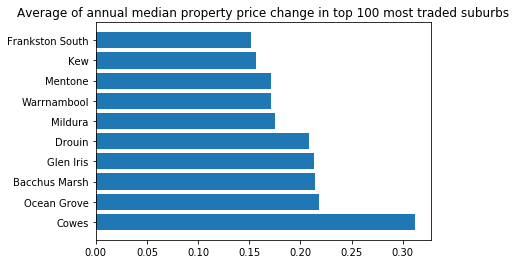

In [104]:
plt.barh(y=subg2.sort_values(by='mean_growth',ascending=False)[:10].name,
        width=subg2.sort_values(by='mean_growth',ascending=False)[:10].mean_growth)
plt.xticks(rotation=0)
plt.title('Average of annual median property price change in top 100 most traded suburbs');

Now let's do the same but this time for each type of property separately. I'll check to top 100 suburbs for houses and top 50 suburbs for the other 3 property types.  
To make the comparison fair, I'll give increasing weight to more recent years.

In [105]:
subg = pd.DataFrame()
for sub in tem.sort_values(by='count_house',ascending=False)[:100].name:    
    a = average_property_growth(sub,'House')
    subg = subg.append({'name': sub, 'house_growth': a}, ignore_index=True)
for sub in tem.sort_values(by='count_townhouse',ascending=False)[:50].name:    
    b = average_property_growth(sub,'Townhouse')
    subg = subg.append({'name': sub, 'townhouse_growth': b}, ignore_index=True)
for sub in tem.sort_values(by='count_unit',ascending=False)[:50].name:    
    c = average_property_growth(sub,'Unit')
    subg = subg.append({'name': sub, 'unit_growth': c}, ignore_index=True)
for sub in tem.sort_values(by='count_apartment',ascending=False)[:50].name:    
    d = average_property_growth(sub,'Apartment')
    subg = subg.append({'name': sub, 'apartment_growth': d}, ignore_index=True)

In [106]:
subg['h_mean']=subg.house_growth[:100].apply(lambda x : (x[1:]*[1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2][-len(x.values[1:]):]).mean())
subg['t_mean']=subg.townhouse_growth[100:150].apply(lambda x : (x[1:]*[1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2][-len(x.values[1:]):]).mean())
subg['u_mean']=subg.unit_growth[150:200].apply(lambda x : (x[1:]*[1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2][-len(x.values[1:]):]).mean())
subg['a_mean']=subg.apartment_growth[200:250].apply(lambda x : (x[1:]*[1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2][-len(x.values[1:]):]).mean())

In [107]:
subg.sort_values(by='t_mean',ascending=False)

,house_growth,name,townhouse_growth,unit_growth,apartment_growth,h_mean,t_mean,u_mean,a_mean
133,NaN,Kew,year 2009 NaN 2010 0.571429 2012 ...,NaN,NaN,NaN,0.288952,NaN,NaN
137,NaN,Frankston,year 2009 NaN 2010 0.512121 2011 ...,NaN,NaN,NaN,0.168049,NaN,NaN
119,NaN,Glen Waverley,year 2008 NaN 2009 0.263158 2010 ...,NaN,NaN,NaN,0.150139,NaN,NaN
117,NaN,Kensington,year 2008 NaN 2009 0.141055 2010 ...,NaN,NaN,NaN,0.145176,NaN,NaN
101,NaN,Bentleigh East,year 2009 NaN 2010 0.406897 2011 ...,NaN,NaN,NaN,0.141644,NaN,NaN
120,NaN,Highett,year 2008 NaN 2009 0.213904 2010 ...,NaN,NaN,NaN,0.139988,NaN,NaN
104,NaN,Cheltenham,year 2008 NaN 2009 0.421252 2010 ...,NaN,NaN,NaN,0.139845,NaN,NaN
146,NaN,Black Rock,year 2008 NaN 2009 0.203810 2010 ...,NaN,NaN,NaN,0.136412,NaN,NaN
138,NaN,Essendon,year 2008 NaN 2010 0.336735 2011 ...,NaN,NaN,NaN,0.136069,NaN,NaN
105,NaN,Mount Waverley,year 2008 NaN 2009 0.201598 2010 ...,NaN,NaN,NaN,0.132407,NaN,NaN


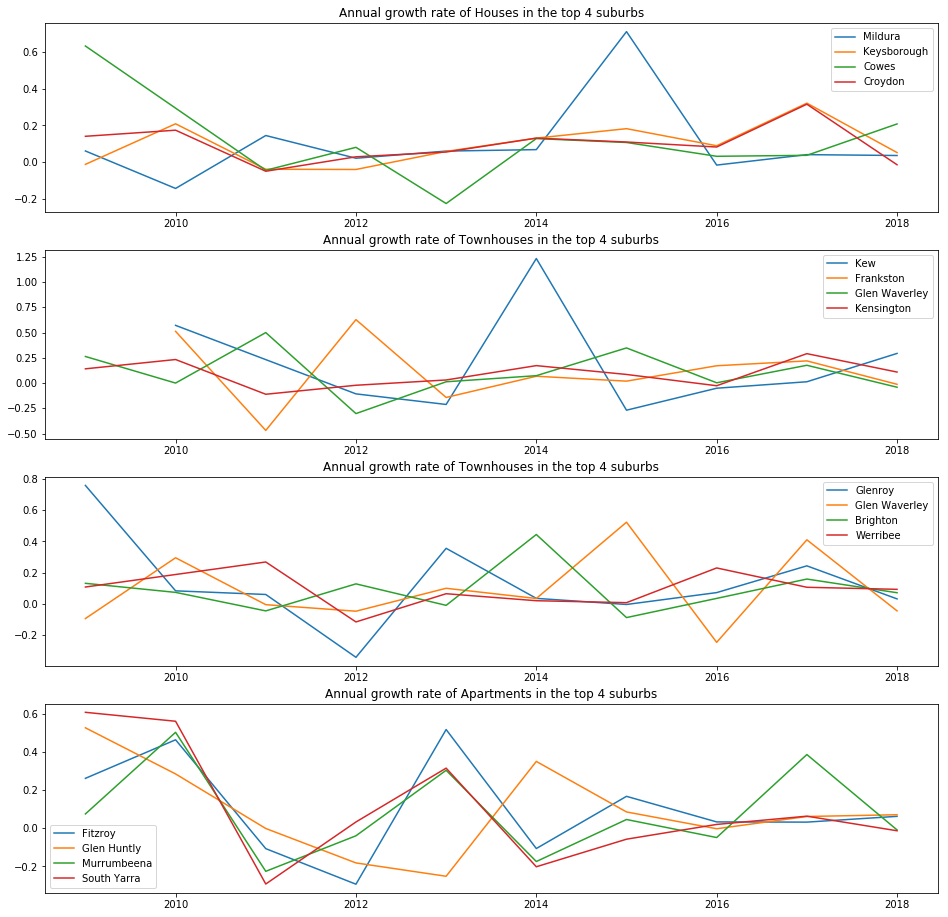

In [108]:
fig=plt.figure(figsize=(16,16))
ax = fig.add_subplot(411)
ax.plot(subg.house_growth[subg.sort_values(by='h_mean',ascending=False).index[0]][1:])
ax.plot(subg.house_growth[subg.sort_values(by='h_mean',ascending=False).index[1]][1:])
ax.plot(subg.house_growth[subg.sort_values(by='h_mean',ascending=False).index[2]][1:])
ax.plot(subg.house_growth[subg.sort_values(by='h_mean',ascending=False).index[3]][1:])
plt.title('Annual growth rate of Houses in the top 4 suburbs')
plt.legend([subg.sort_values(by='h_mean',ascending=False).name.values[0],subg.sort_values(by='h_mean',ascending=False).name.values[1],
            subg.sort_values(by='h_mean',ascending=False).name.values[2],subg.sort_values(by='h_mean',ascending=False).name.values[3]])
az = fig.add_subplot(412)
az.plot(subg.townhouse_growth[subg.sort_values(by='t_mean',ascending=False).index[0]][1:])
az.plot(subg.townhouse_growth[subg.sort_values(by='t_mean',ascending=False).index[1]][1:])
az.plot(subg.townhouse_growth[subg.sort_values(by='t_mean',ascending=False).index[2]][1:])
az.plot(subg.townhouse_growth[subg.sort_values(by='t_mean',ascending=False).index[3]][1:])
plt.title('Annual growth rate of Townhouses in the top 4 suburbs')
plt.legend([subg.sort_values(by='t_mean',ascending=False).name.values[0],subg.sort_values(by='t_mean',ascending=False).name.values[1],
            subg.sort_values(by='t_mean',ascending=False).name.values[2],subg.sort_values(by='t_mean',ascending=False).name.values[3]])
az = fig.add_subplot(413)
az.plot(subg.unit_growth[subg.sort_values(by='u_mean',ascending=False).index[0]][1:])
az.plot(subg.unit_growth[subg.sort_values(by='u_mean',ascending=False).index[1]][1:])
az.plot(subg.unit_growth[subg.sort_values(by='u_mean',ascending=False).index[2]][1:])
az.plot(subg.unit_growth[subg.sort_values(by='u_mean',ascending=False).index[3]][1:])
plt.title('Annual growth rate of Townhouses in the top 4 suburbs')
plt.legend([subg.sort_values(by='u_mean',ascending=False).name.values[0],subg.sort_values(by='u_mean',ascending=False).name.values[1],
            subg.sort_values(by='u_mean',ascending=False).name.values[2],subg.sort_values(by='u_mean',ascending=False).name.values[3]])
az = fig.add_subplot(414)
az.plot(subg.apartment_growth[subg.sort_values(by='a_mean',ascending=False).index[0]][1:])
az.plot(subg.apartment_growth[subg.sort_values(by='a_mean',ascending=False).index[1]][1:])
az.plot(subg.apartment_growth[subg.sort_values(by='a_mean',ascending=False).index[2]][1:])
az.plot(subg.apartment_growth[subg.sort_values(by='a_mean',ascending=False).index[3]][1:])
plt.title('Annual growth rate of Apartments in the top 4 suburbs')
plt.legend([subg.sort_values(by='a_mean',ascending=False).name.values[0],subg.sort_values(by='a_mean',ascending=False).name.values[1],
            subg.sort_values(by='a_mean',ascending=False).name.values[2],subg.sort_values(by='a_mean',ascending=False).name.values[3]]);


It would also be interesting to know how real estate agencies function in different suburbs and whether of not some of them are mosre successful than the other ones.  
To do this I categorize them based on the suburbs and then compare thier sold prices in a specific suburb for a specific type of property such a 3 bedroom House.  
Narrowing down the dataset too much would result in not having many rows in each investigation and not getting a smooth answer.

In [109]:
agencies = clean.groupby(['agency']).address.count().sort_values(ascending=False)[:50]

In [110]:
suburbs = clean.groupby(['suburb']).address.count().sort_values(ascending=False)[:100]

In [111]:

clean[(clean.suburb=='Pakenham') & (clean.agency=='Ray White') & (clean.price>0) & (clean.year>2017)]

,address,agency,agent_name,baths,beds,cars,price,property_type,sold_date,suburb,year,month,month_year
632679,"60 Highland Drive, Pakenham",Ray White,Claus Zelno,0,0,0,250000,Residential Land,2018-06-13,Pakenham,2018,6,2018-06
634808,"1/12 Renlik Court, Pakenham",Ray White,Jodie Menadue,1,3,2,360000,Unit,2018-11-01,Pakenham,2018,11,2018-11
635877,"84 Shearwater Drive, Pakenham",Ray White,Elizabeth Verleg,1,2,2,405000,House,2018-12-19,Pakenham,2018,12,2018-12
635974,"1/35 Princes Highway, Pakenham",Ray White,Jodie Menadue,1,3,2,410000,Unit,2018-04-12,Pakenham,2018,4,2018-04
636156,"4 Brooke Court, Pakenham",Ray White,Gavin Staindl,1,2,2,415050,House,2018-03-08,Pakenham,2018,3,2018-03
636181,"1 Anita Place, Pakenham",Ray White,None,1,3,2,417500,House,2018-08-31,Pakenham,2018,8,2018-08
636307,"63 Pinnacle Drive, Pakenham",Ray White,Jodie Menadue,2,2,1,420277,House,2018-09-19,Pakenham,2018,9,2018-09
636558,"26 Devine Drive, Pakenham",Ray White,Jodie Menadue,2,4,2,435000,House,2018-11-30,Pakenham,2018,11,2018-11
636629,"40 Cascade Way, Pakenham",Ray White,None,2,3,2,439000,House,2018-01-08,Pakenham,2018,1,2018-01
636634,"1/7 Jamieson Court, Pakenham",Ray White,Gavin Staindl,2,3,2,440000,Unit,2018-11-27,Pakenham,2018,11,2018-11


In [112]:
new_2018 = pd.DataFrame()
for i in suburbs.index:
    for j in agencies.index:
        a = clean[(clean.agency== j) & (clean.suburb==i )& (clean.price>0) & (clean.year == 2018)].copy()
        h2 = a[(a.property_type=='House') & (a.beds==2)].price.mean()
        h3 = a[(a.property_type=='House') & (a.beds==3)].price.mean()
        h4 = a[(a.property_type=='House') & (a.beds==4)].price.mean()
        h5 = a[(a.property_type=='House') & (a.beds==5)].price.mean()
        t1 = a[(a.property_type=='Townhouse') & (a.beds==1)].price.mean()
        t2 = a[(a.property_type=='Townhouse') & (a.beds==2)].price.mean()
        t3 = a[(a.property_type=='Townhouse') & (a.beds==3)].price.mean()
        t4 = a[(a.property_type=='Townhouse') & (a.beds==4)].price.mean()
        u1 = a[(a.property_type=='Unit') & (a.beds==1)].price.mean()
        u2 = a[(a.property_type=='Unit') & (a.beds==2)].price.mean()
        u3 = a[(a.property_type=='Unit') & (a.beds==3)].price.mean()
        u4 = a[(a.property_type=='Unit') & (a.beds==4)].price.mean()
        a1 = a[(a.property_type=='Apartment') & (a.beds==1)].price.mean()
        a2 = a[(a.property_type=='Apartment') & (a.beds==2)].price.mean()
        a3 = a[(a.property_type=='Apartment') & (a.beds==3)].price.mean()
        new_2018 = new_2018.append({'suburb':i, 'agency':j, 'h2':h2, 'h3':h3, 'h4':h4, 'h5':h5, 't1':t1, 't2':t2, 't3':t3
                  , 't4':t4, 'u1':u1, 'u2':u2, 'u3':u3, 'u4':u4, 'a1':a1, 'a2':a2, 'a3':a3},ignore_index=True)

In [113]:
new_2018.to_csv('suburb_agency_2018.csv')

In [114]:
new_2018

,a1,a2,a3,agency,h2,h3,h4,h5,suburb,t1,t2,t3,t4,u1,u2,u3,u4
0,NaN,NaN,NaN,Ray White,413442.333333,499751.617647,5.927333e+05,1.120500e+06,Pakenham,NaN,450000.0,491750.000000,NaN,NaN,NaN,403333.333333,NaN
1,NaN,NaN,NaN,Barry Plant,390000.000000,497537.027778,5.648627e+05,7.920000e+05,Pakenham,NaN,NaN,NaN,NaN,NaN,378000.0,NaN,NaN
2,NaN,NaN,NaN,None,NaN,486750.000000,4.950000e+05,NaN,Pakenham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,hockingstuart,NaN,492750.000000,5.800000e+05,NaN,Pakenham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,Stockdale & Leggo,365000.000000,491727.272727,5.657850e+05,NaN,Pakenham,NaN,NaN,478000.000000,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,Nelson Alexander,NaN,NaN,NaN,NaN,Pakenham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,Harcourts,402500.000000,502068.115942,5.693660e+05,6.970000e+05,Pakenham,NaN,NaN,NaN,NaN,NaN,358800.0,420000.000000,NaN
7,NaN,NaN,NaN,Buxton,NaN,NaN,NaN,NaN,Pakenham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,LJ Hooker,365500.000000,476397.435897,5.720400e+05,5.050000e+05,Pakenham,NaN,373750.0,559000.000000,NaN,NaN,374000.0,422200.000000,NaN
9,NaN,NaN,NaN,Jellis Craig,NaN,NaN,NaN,NaN,Pakenham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
